<a href="https://colab.research.google.com/github/jaydengonzal2021/Statistics/blob/main/JG_real_Hahn_Stats_Lab_8_Linear_Model_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

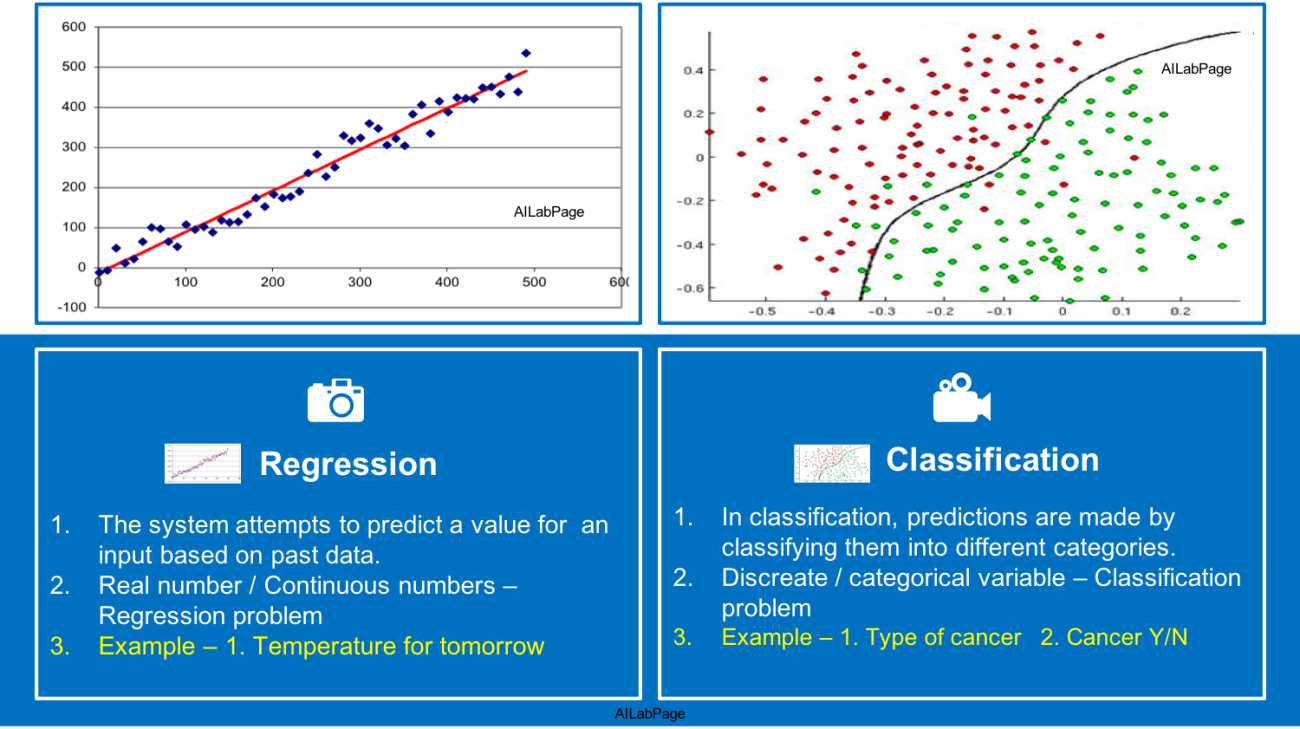

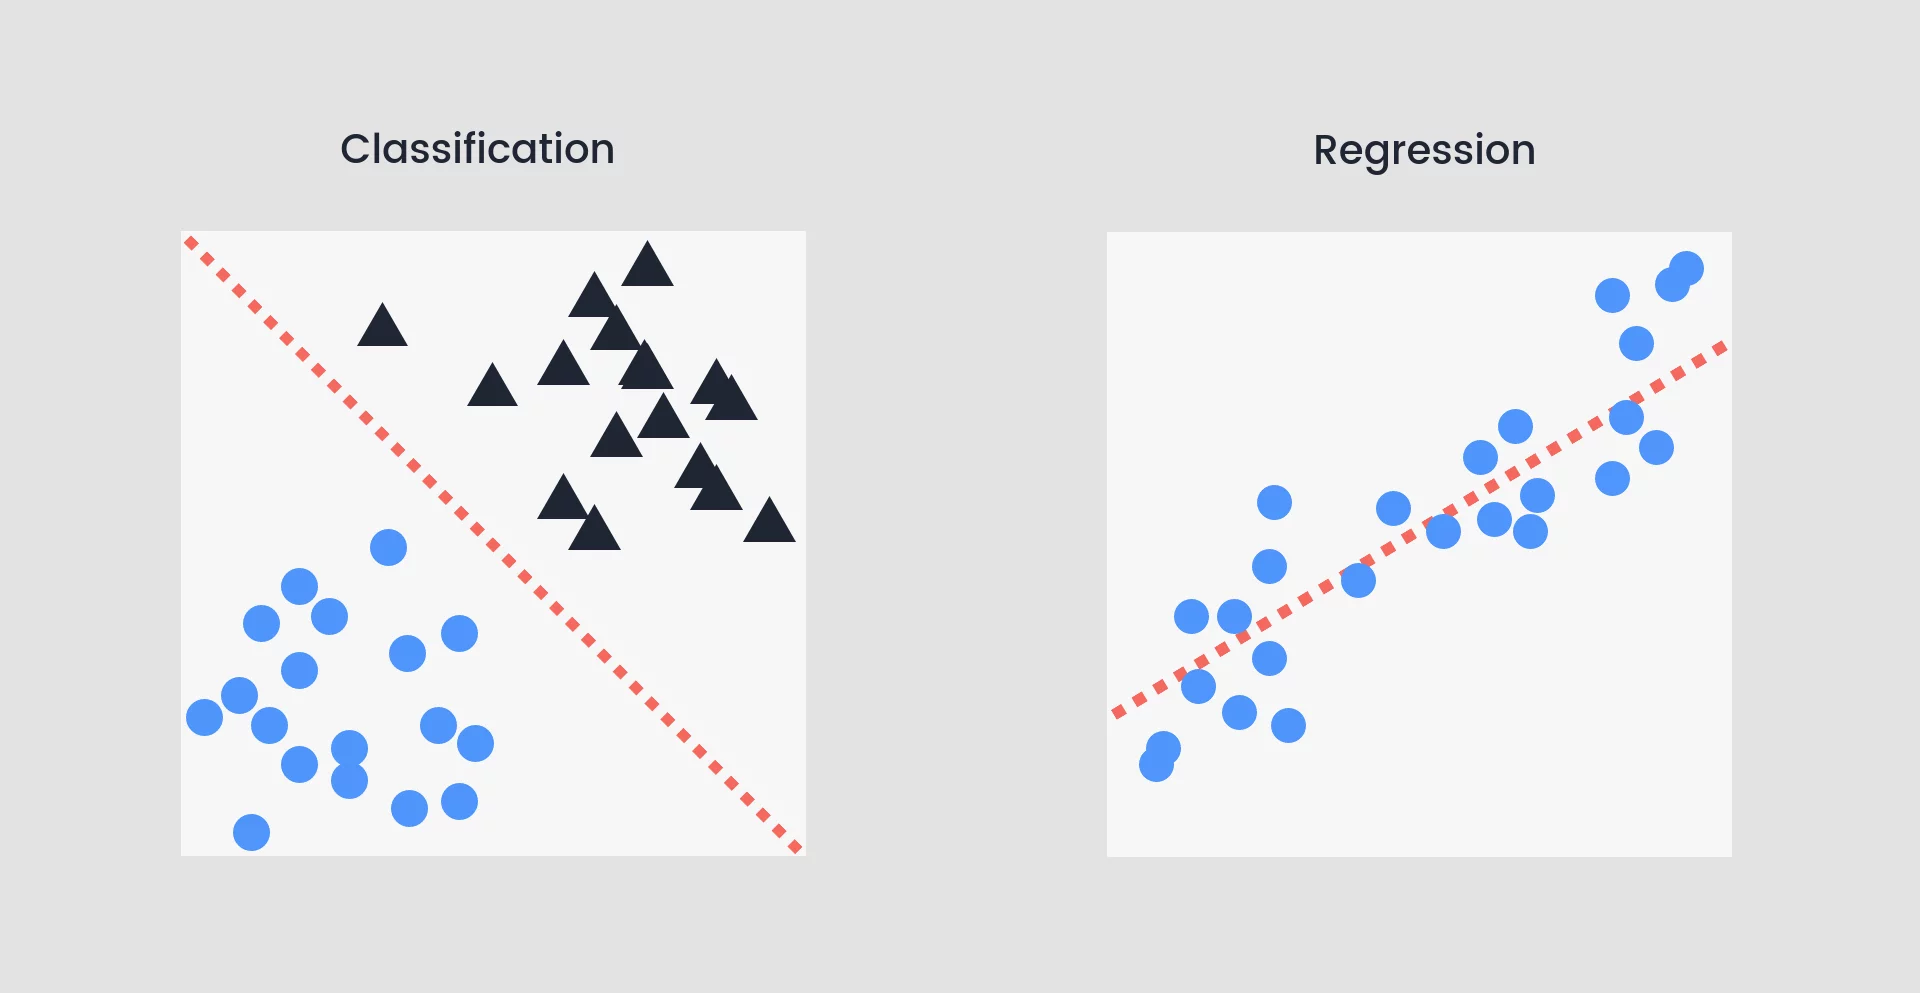

https://docs.google.com/presentation/d/1gY6kLb7YJtWzWqprVe3XfOjHALkPH6I1FvZ7MssWiTU/edit?usp=sharing

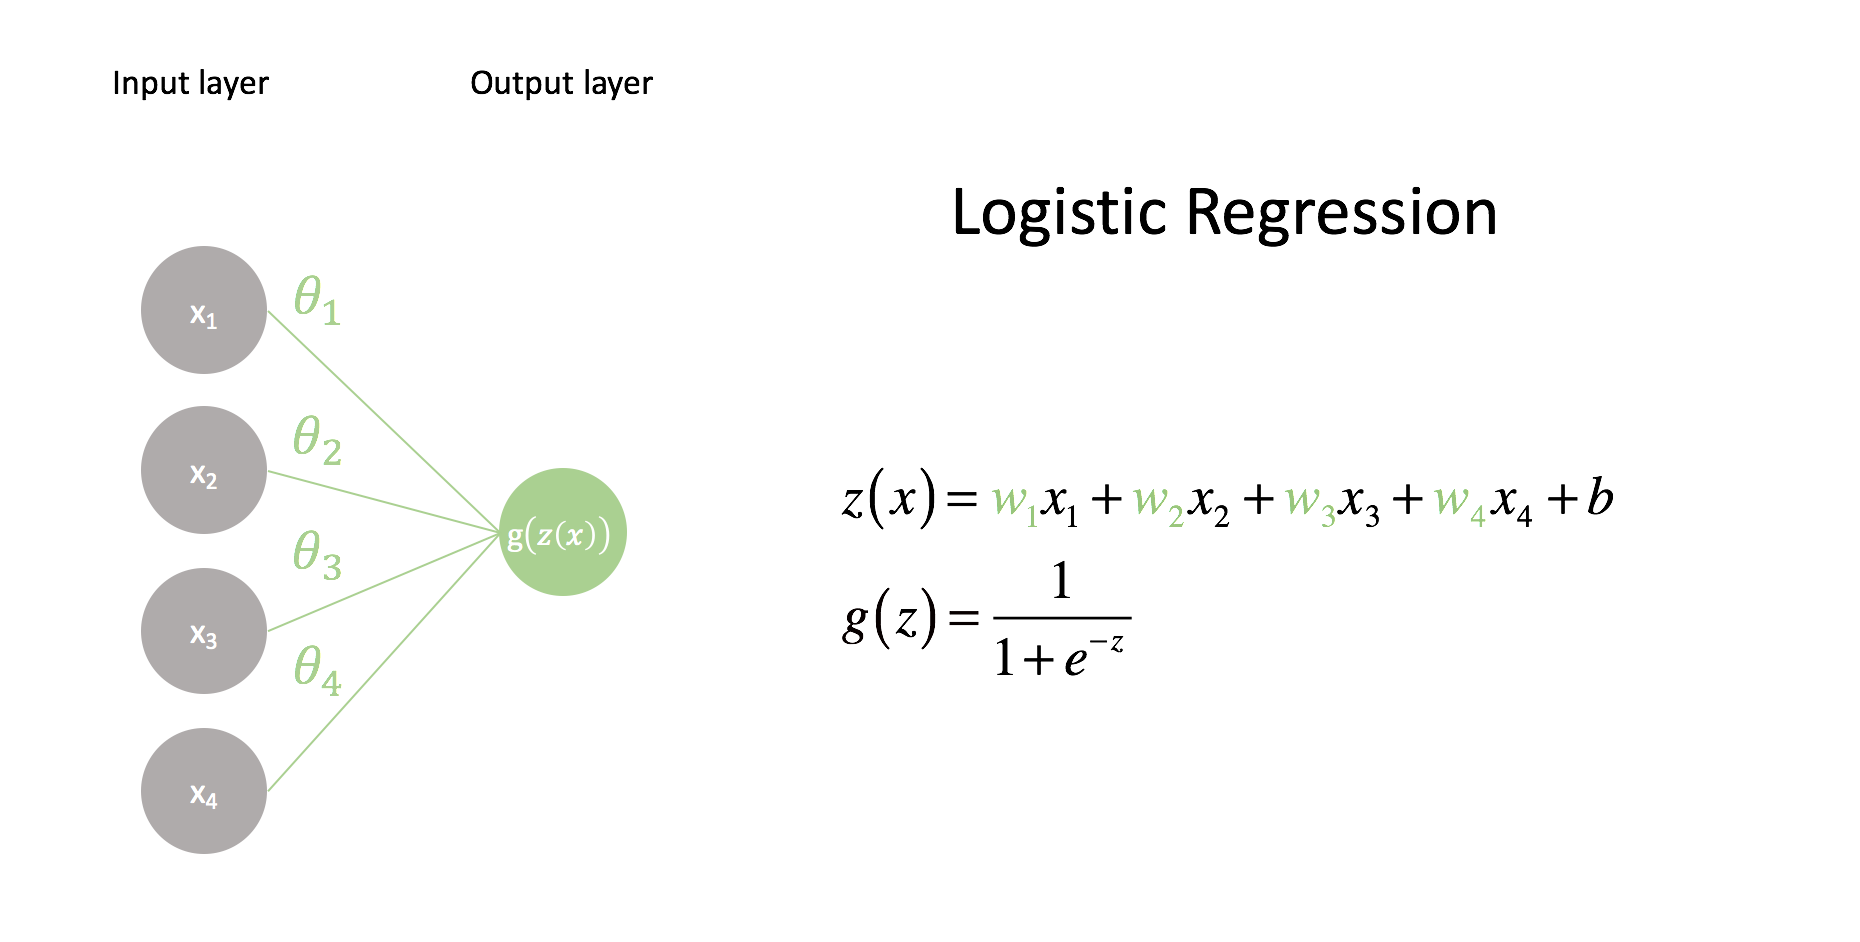

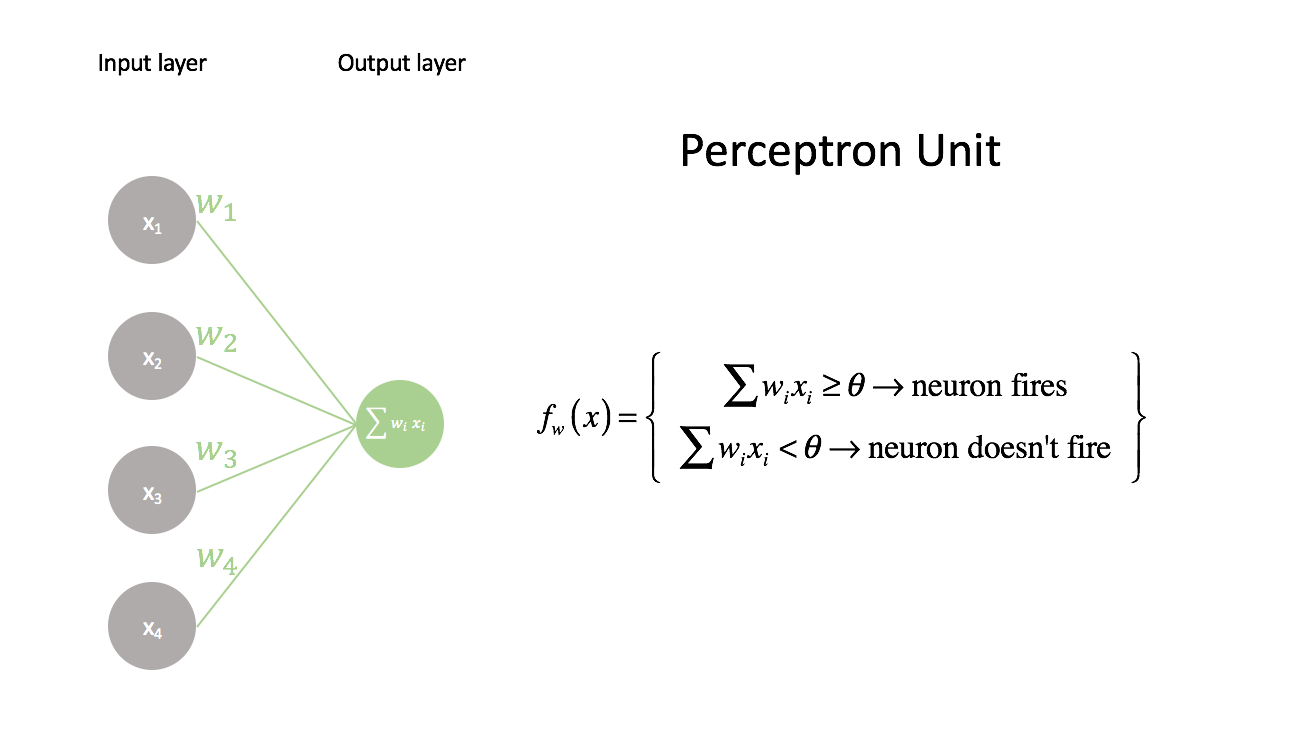

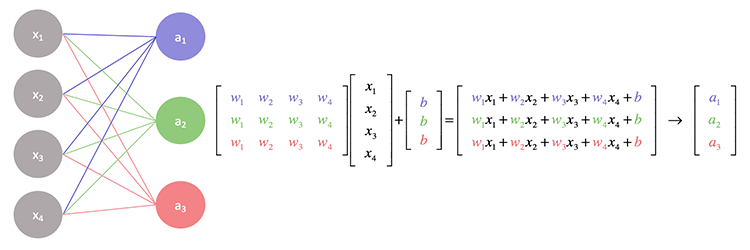

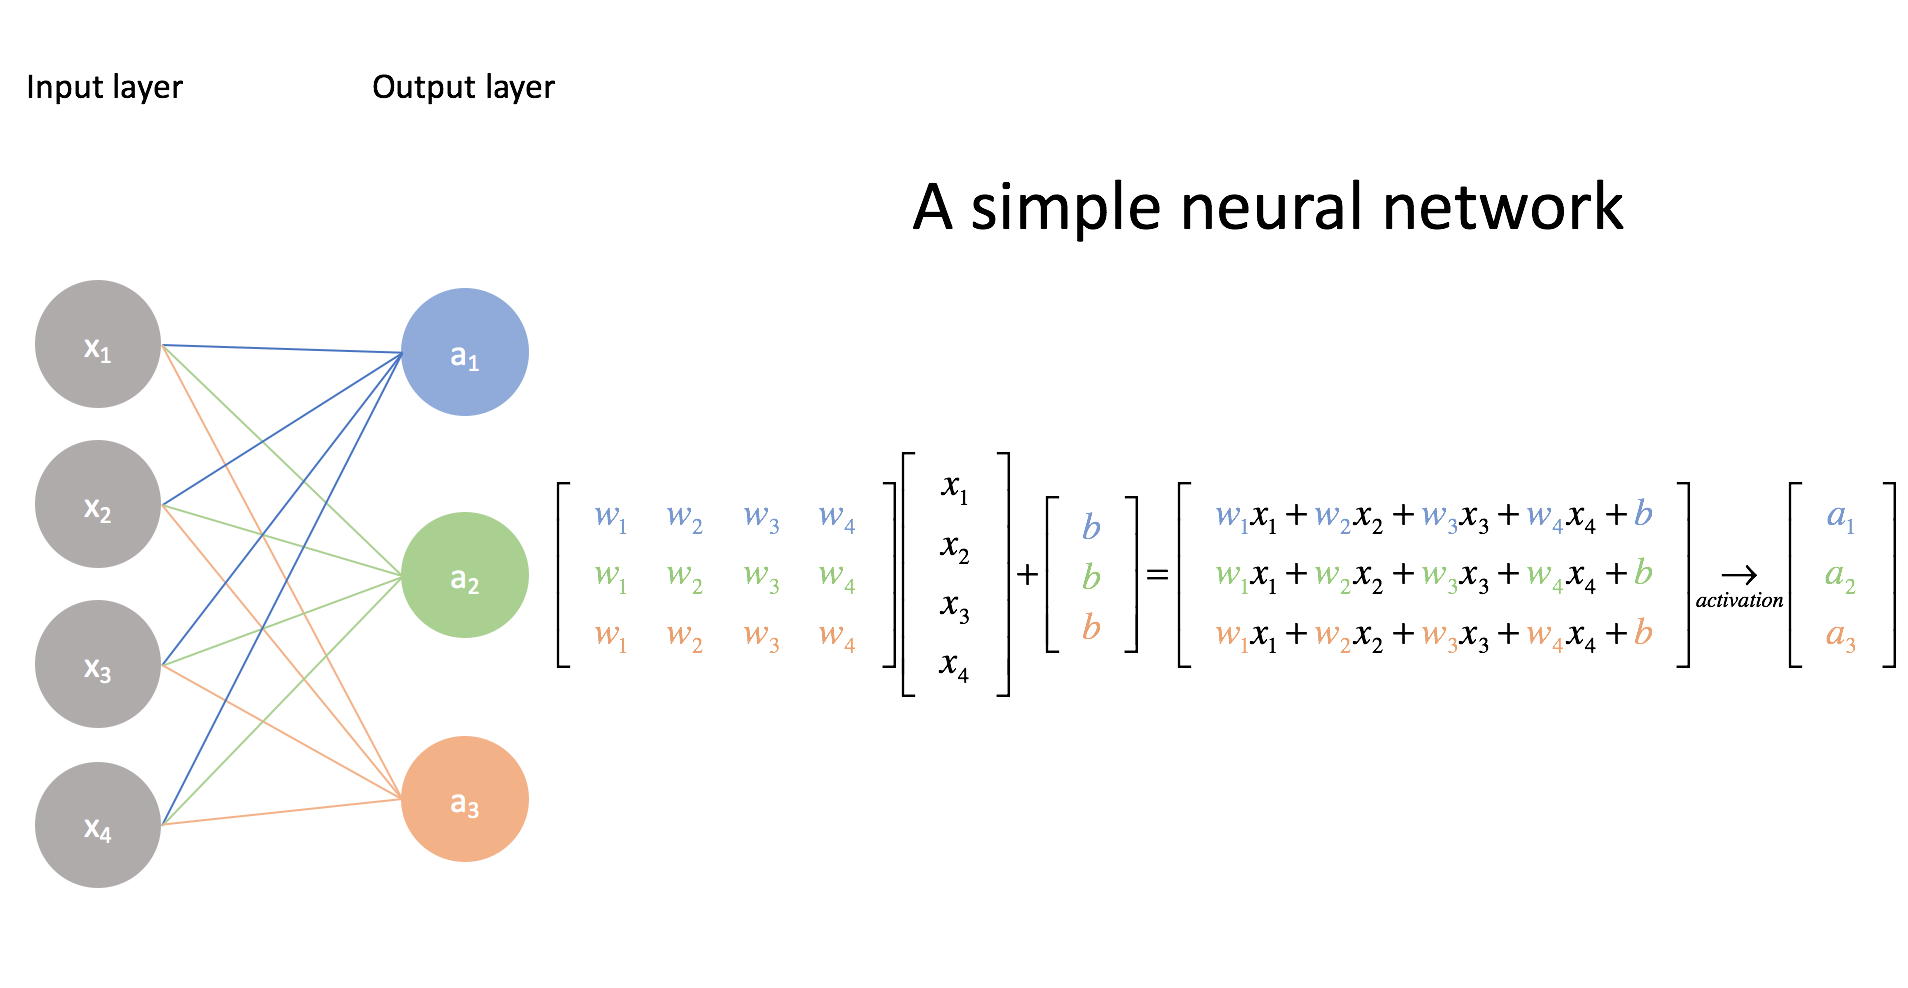

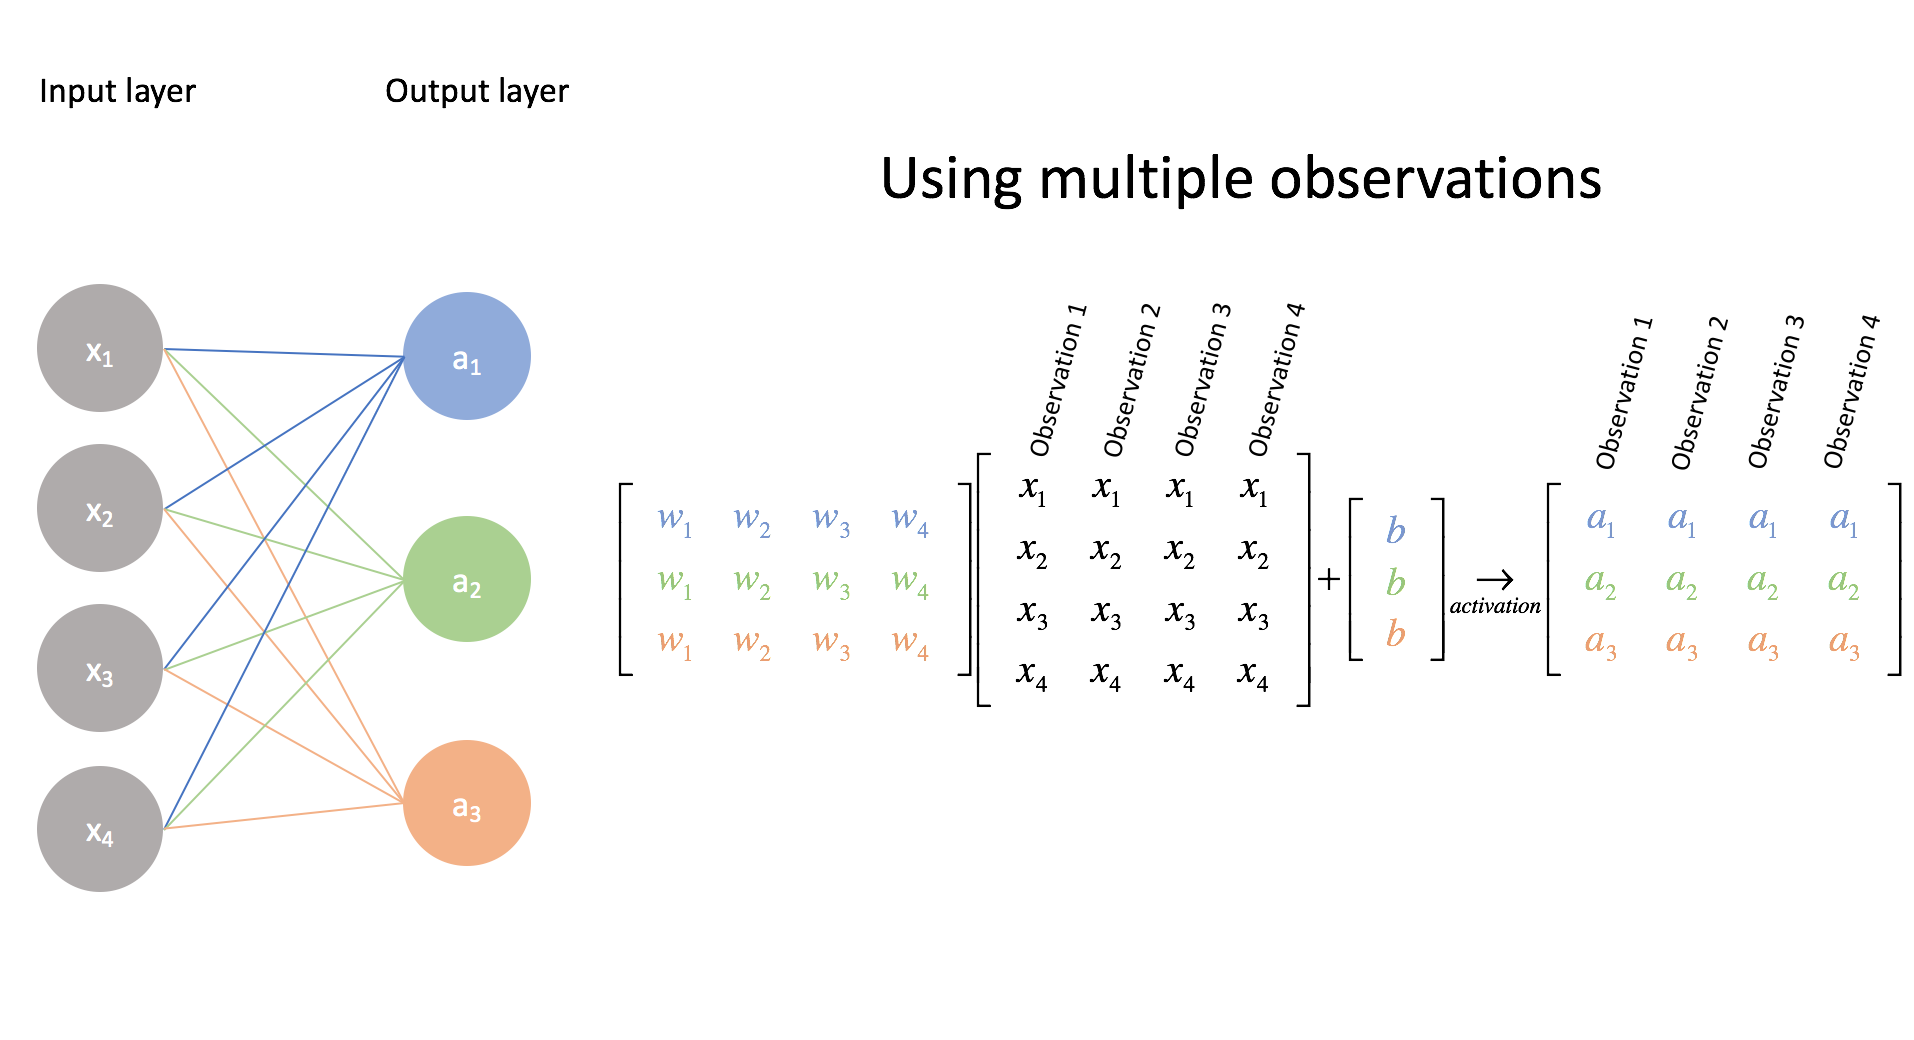

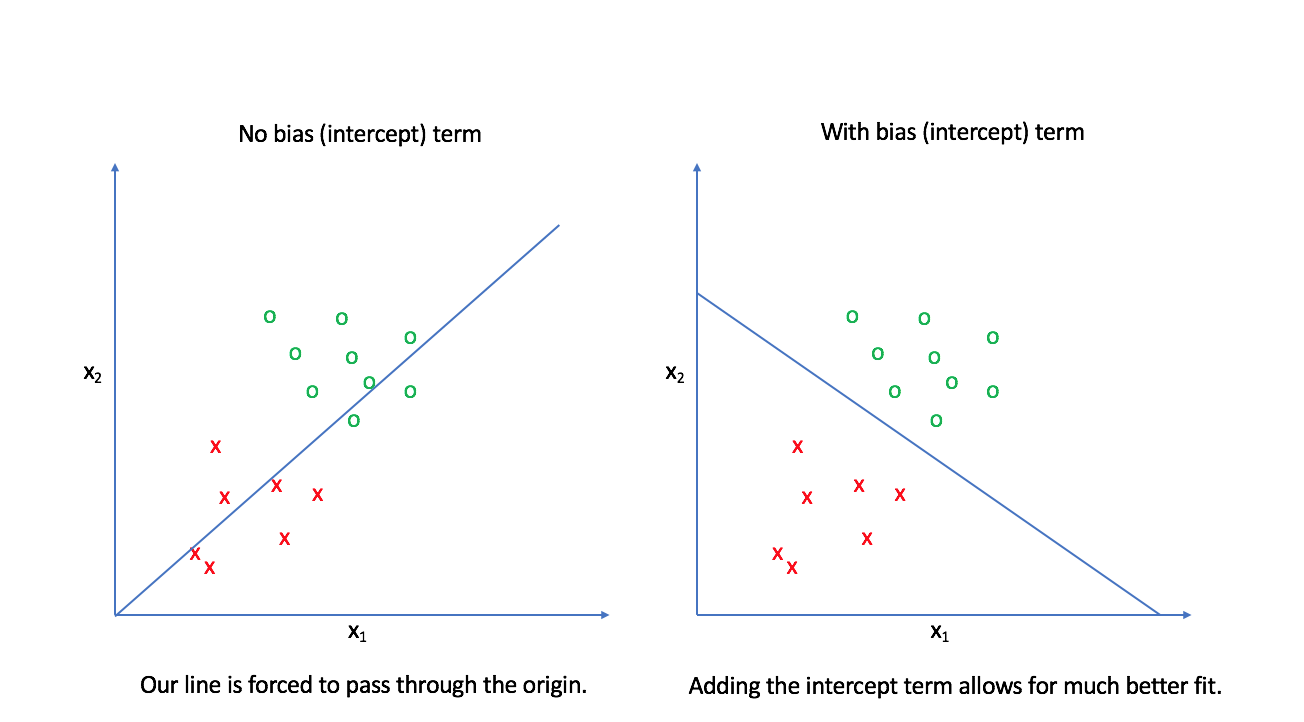

In [ ]:
!pip install git+https://github.com/williamedwardhahn/mpcr
from mpcr import *
import numpy as np
import matplotlib.pyplot as plt
!pip install wget
import wget
import torch
import torch.nn as nn
from torch import tensor 
from torch.autograd import Variable
from torch import randn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/williamedwardhahn/mpcr to /tmp/pip-req-build-_jhu_rkf
  Running command git clone -q https://github.com/williamedwardhahn/mpcr /tmp/pip-req-build-_jhu_rkf
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# $y=mx+b$

In [ ]:
x = np.arange(0,9)

In [ ]:
x.shape

(9,)

In [ ]:
x = x[:,None]

In [ ]:
x.shape

(9, 1)

In [ ]:
y = 3*x-5

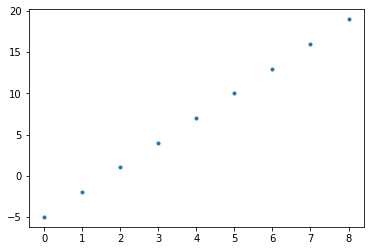

In [ ]:
plt.plot(x,y,'.')

##Solve Linear Fit Using Pytorch Gradient Descent

In [ ]:
x = torch.Tensor(x) # Convert the numpy vectors to pytorch tensors 
y = torch.Tensor(y)

In [ ]:
m = Variable(randn(1,1), requires_grad=True) # Initialize pytorch variables, i.e. values you want to optimize. In this case with normally distributed random numbers, one for m the slope and one for b the interscept
b = Variable(randn(1,1), requires_grad=True)

In [ ]:
learning_rate = 0.001 # Descend Gradient Slowly so as to Not Overshoot Minima and Oscillate

In [ ]:
for t in range(1000):

    y_pred = m * x + b  # Define Model 
    
    loss = (y_pred - y).pow(2).sum() # Define Loss Function as Sum of the Squares of the Differences 

    loss.backward() # Calculate Gradient, dLoss/dp for Each Parameter p 
    
    m.data -= learning_rate * m.grad.data # Gradient Descent
    b.data -= learning_rate * b.grad.data

    m.grad.zero_() # Reset Gradient Value
    b.grad.zero_()

    print(t, loss.item(),m.item(),b.item())

0 431.0079345703125 1.2184641361236572 0.8035950660705566
1 206.17442321777344 1.5274720191955566 0.8274009227752686
2 130.13571166992188 1.7086905241012573 0.8285297155380249
3 104.0084228515625 1.8158906698226929 0.8165904879570007
4 94.6274642944336 1.8802127838134766 0.7971477508544922
5 90.86949920654297 1.9196913242340088 0.7734237909317017
6 89.0036849975586 1.9447706937789917 0.7472843527793884
7 87.77870178222656 1.961499810218811 0.7198097705841064
8 86.77477264404297 1.9733816385269165 0.6916252374649048
9 85.85106658935547 1.9824448823928833 0.6630924940109253
10 84.96027374267578 1.989864706993103 0.6344208121299744
11 84.08646392822266 1.9963215589523315 0.6057309508323669
12 83.2242431640625 2.0022096633911133 0.5770926475524902
13 82.37173461914062 2.0077574253082275 0.5485458970069885
14 81.52824401855469 2.013097047805786 0.5201135277748108
15 80.6935043334961 2.0183053016662598 0.4918085038661957
16 79.86732482910156 2.0234265327453613 0.46363797783851624
17 79.04962

In [ ]:
loss.item()

0.0032287004869431257

In [ ]:
m.item()

2.9937915802001953

In [ ]:
b.item()

-4.965261459350586

# Pytorch Linear Model

In [ ]:
# Hyper-parameters
input_size = 1
output_size = 1
num_epochs = 1000
learning_rate = 0.01

In [ ]:
# Linear regression model
model = nn.Linear(input_size, output_size)

In [ ]:
# Loss and optimizer
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)  

In [ ]:
# Convert numpy arrays to torch tensors
inputs = x
targets = y

In [ ]:
# Train the model
for epoch in range(num_epochs):
    
    
    # Forward pass
    outputs = model(inputs)
    
    loss = criterion(outputs, targets)
    
    # Backward and optimize
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    
    print(epoch+1, num_epochs, loss.item())


1 1000 196.2705535888672
2 1000 62.22047805786133
3 1000 24.153430938720703
4 1000 13.29044246673584
5 1000 10.138392448425293
6 1000 9.172588348388672
7 1000 8.827223777770996
8 1000 8.658519744873047
9 1000 8.540688514709473
10 1000 8.438070297241211
11 1000 8.340554237365723
12 1000 8.245261192321777
13 1000 8.151365280151367
14 1000 8.058629989624023
15 1000 7.966973304748535
16 1000 7.87636661529541
17 1000 7.78679084777832
18 1000 7.698237895965576
19 1000 7.610687255859375
20 1000 7.524135112762451
21 1000 7.438566207885742
22 1000 7.353972434997559
23 1000 7.270339012145996
24 1000 7.187657833099365
25 1000 7.105915546417236
26 1000 7.025103569030762
27 1000 6.945211887359619
28 1000 6.8662261962890625
29 1000 6.788141250610352
30 1000 6.710943222045898
31 1000 6.634622573852539
32 1000 6.559170246124268
33 1000 6.484576225280762
34 1000 6.410830974578857
35 1000 6.337923526763916
36 1000 6.26584529876709
37 1000 6.194586753845215
38 1000 6.124139308929443
39 1000 6.05449247360

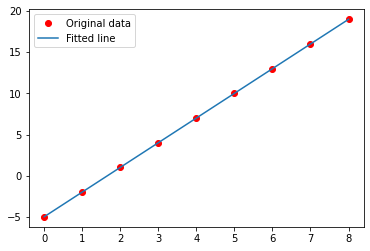

In [ ]:
# Plot the graph
predicted = model(inputs).detach().numpy()


plt.plot(x, y, 'ro', label='Original data')
plt.plot(x, predicted, label='Fitted line')
plt.legend()
plt.show()

In [ ]:
model

Linear(in_features=1, out_features=1, bias=True)

In [ ]:
model.weight

Parameter containing:
tensor([[2.9967]], requires_grad=True)

In [ ]:
model.bias

Parameter containing:
tensor([-4.9815], requires_grad=True)

In [ ]:
def GPU(data):
    return torch.tensor(data, requires_grad=True, dtype=torch.float, device=torch.device('cuda'))

def GPU_data(data):
    return torch.tensor(data, requires_grad=False, dtype=torch.float, device=torch.device('cuda'))

In [ ]:
def plot(x):
    if type(x) == torch.Tensor :
        x = x.cpu().detach().numpy()

    fig, ax = plt.subplots()
    im = ax.imshow(x, cmap = 'gray')
    ax.axis('off')
    fig.set_size_inches(10, 10)
    plt.show()

In [ ]:
def plotfc(x):
    if type(x) == torch.Tensor :
        x = x.cpu().detach().numpy()

    fig, ax = plt.subplots()
    im = ax.imshow(x, cmap = 'cool')
    ax.axis('off')
    fig.set_size_inches(10, 10)
    plt.colorbar(im)
    plt.show()

In [ ]:
def montage_plot(x):
    x = np.pad(x, pad_width=((0, 0), (1, 1), (1, 1)), mode='constant', constant_values=0)
    plot(montage(x))

In [ ]:
def one_hot(y):
    y2 = GPU_data(torch.zeros((y.shape[0],10)))
    for i in range(y.shape[0]):
        y2[i,int(y[i])] = 1
    return y2

In [ ]:
# #MNIST
train_set = datasets.MNIST('./data', train=True, download=True)
test_set = datasets.MNIST('./data', train=False, download=True)

#KMNIST
train_set = datasets.KMNIST('./data', train=True, download=True)
test_set = datasets.KMNIST('./data', train=False, download=True)

# Fashion MNIST
#train_set = datasets.FashionMNIST('./data', train=True, download=True)
#test_set = datasets.FashionMNIST('./data', train=False, download=True)

  0%|          | 0/18165135 [00:00<?, ?it/s]

Extracting ./data/KMNIST/raw/train-images-idx3-ubyte.gz to ./data/KMNIST/raw



  0%|          | 0/29497 [00:00<?, ?it/s]

Extracting ./data/KMNIST/raw/train-labels-idx1-ubyte.gz to ./data/KMNIST/raw



  0%|          | 0/3041136 [00:00<?, ?it/s]

Extracting ./data/KMNIST/raw/t10k-images-idx3-ubyte.gz to ./data/KMNIST/raw



  0%|          | 0/5120 [00:00<?, ?it/s]

Extracting ./data/KMNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/KMNIST/raw



In [ ]:
X = train_set.data.numpy()
X_test = test_set.data.numpy()
Y = train_set.targets.numpy()
Y_test = test_set.targets.numpy()

X = X[:,None,:,:]/255
X_test = X_test[:,None,:,:]/255

In [ ]:
X.shape

(60000, 1, 28, 28)

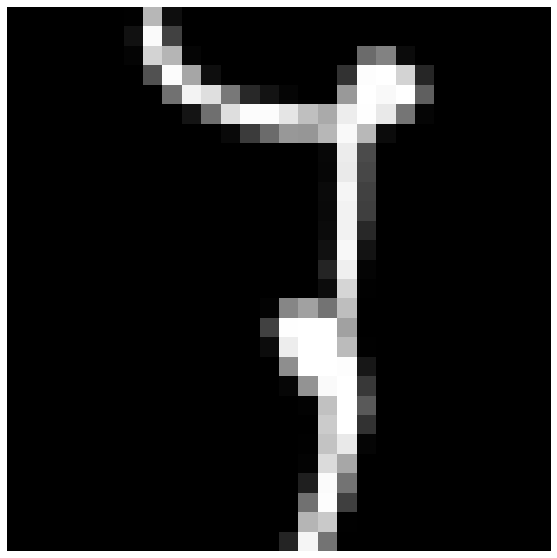

In [ ]:
plot(X[123,0,0:28,0:28])

In [ ]:
Y[123]

2

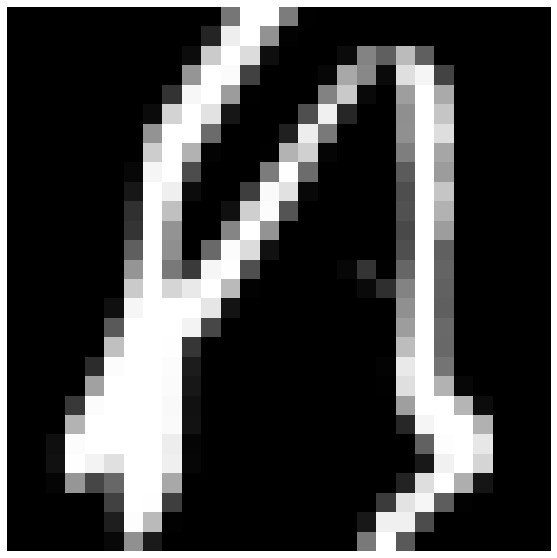

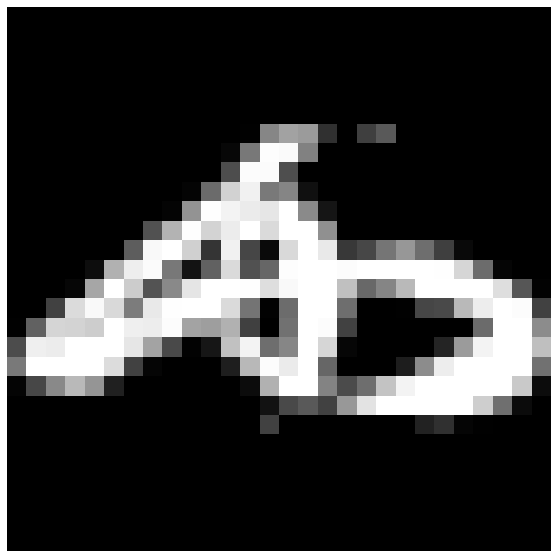

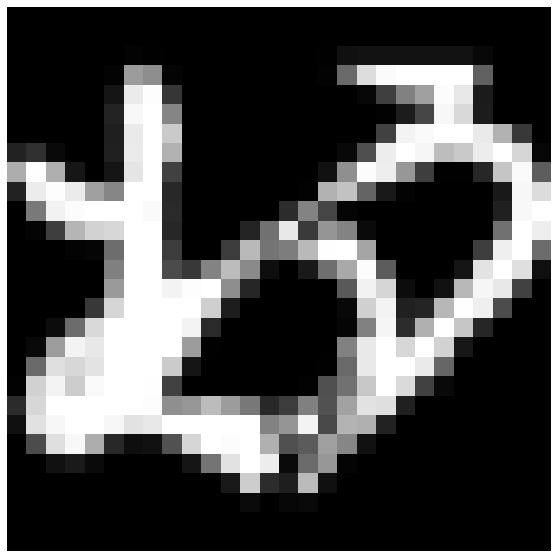

In [ ]:
for i in range(3):
    plot(X[i,0,:,:])

In [ ]:
Y

array([8, 7, 0, ..., 0, 4, 9])

In [ ]:
X[0:25,0,:,:].shape

(25, 28, 28)

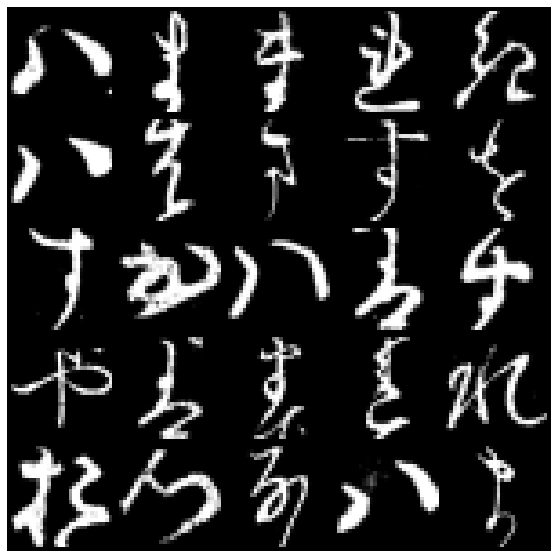

In [ ]:
montage_plot(X[125:150,0,:,:])

In [ ]:
X.shape[0]

60000

In [ ]:
X_test.shape

(10000, 1, 28, 28)

In [ ]:
X.shape[0]

60000

In [ ]:
X_test.shape[0]

10000

In [ ]:
28*28

784

In [ ]:
X = X.reshape(X.shape[0],784)
X_test = X_test.reshape(X_test.shape[0],784)

In [ ]:
X.shape,X_test.shape

((60000, 784), (10000, 784))

In [ ]:
X[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.4627451 , 1.        , 1.        , 0.48627451,
       0.00392157, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.14117647, 0.93333333,
       1.        , 0.57254902, 0.00784314, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.04705882, 0.79607843, 1.        , 0.8627451 , 0.05490196,
       0.        , 0.        , 0.        , 0.04313725, 0.51764

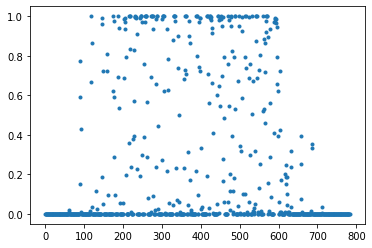

In [ ]:
plt.plot(X[100],'.')

(array([548.,  11.,  17.,  18.,  15.,  17.,  16.,  14.,  16., 112.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

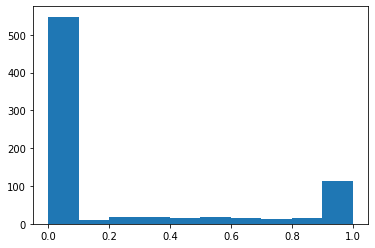

In [ ]:
plt.hist(X[0])

In [ ]:
X = GPU_data(X)
Y = GPU_data(Y)
X_test = GPU_data(X_test)
Y_test = GPU_data(Y_test)

In [ ]:
url = 'https://github.com/williamedwardhahn/ComplexSystems/raw/main/W.data'  
wget.download(url,"W.data")

'W (3).data'

In [ ]:
W = torch.load("W.data")

In [ ]:
W.shape

torch.Size([784, 10])

In [ ]:
X.shape

torch.Size([60000, 784])

In [ ]:
def plot(x):
    if type(x) == torch.Tensor :
        x = x.cpu().detach().numpy()

    fig, ax = plt.subplots()
    im = ax.imshow(x, cmap = 'gray')
    ax.axis('off')
    fig.set_size_inches(10, 100)
    plt.show()

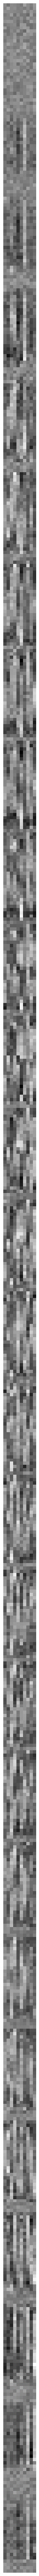

In [ ]:
plot(W[0:784,:10])

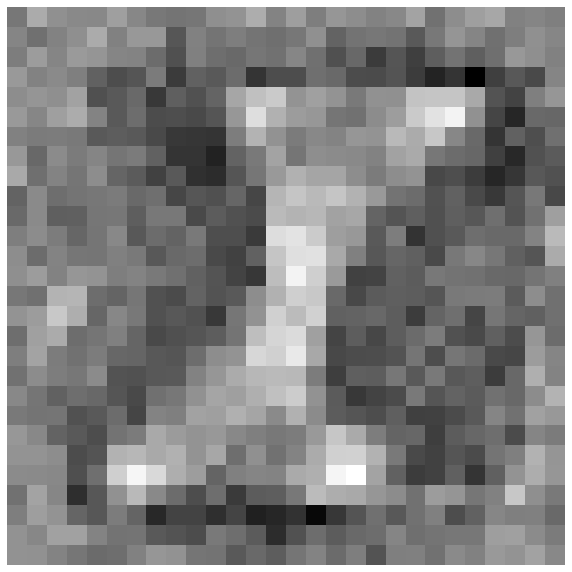

In [ ]:
plot(W[:,1].reshape(28,28))

In [ ]:
X.shape

torch.Size([60000, 784])

In [ ]:
b = 1000

def get_batch(mode):
    if mode == "train":
        r = np.random.randint(X.shape[0]-b) 
        x = X[r:r+b,:]
        y = Y[r:r+b]
    elif mode == "test":
        r = np.random.randint(X_test.shape[0]-b)
        x = X_test[r:r+b,:]
        y = Y_test[r:r+b]
    return x,y

In [ ]:
x,y = get_batch('train')

In [ ]:
x.shape

torch.Size([1000, 784])

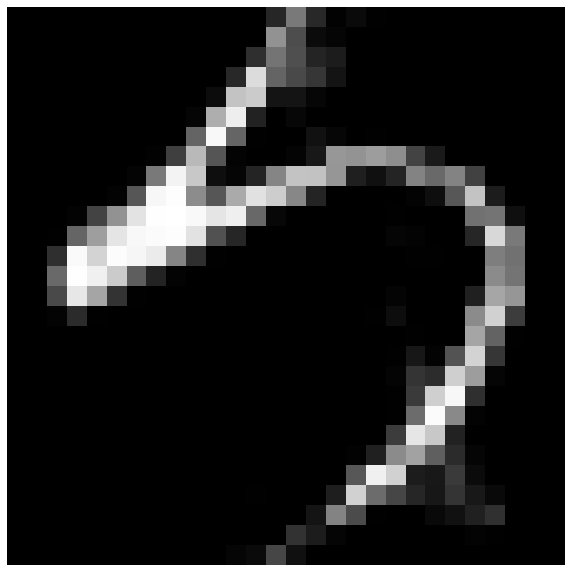

In [ ]:
plot(x[0].reshape(28,28))

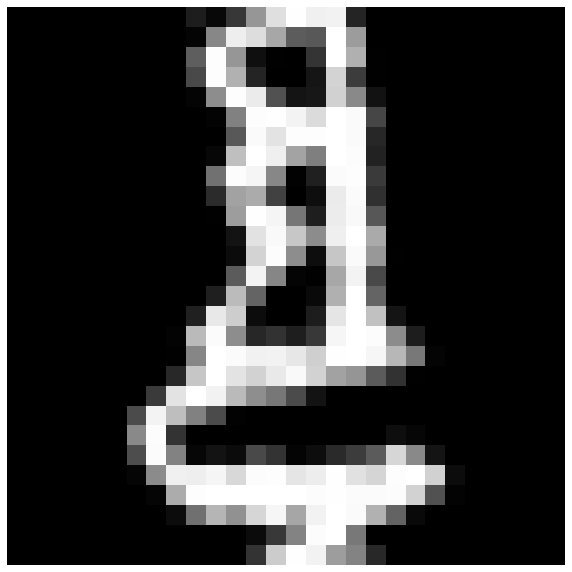

In [ ]:
plot(x[1].reshape(28,28))

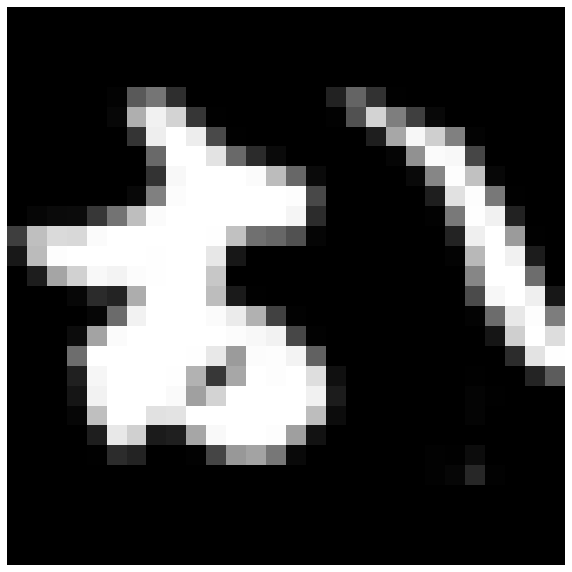

In [ ]:
plot(x[2].reshape(28,28))

In [ ]:
y

tensor([3., 8., 0., 5., 5., 9., 8., 5., 9., 6., 2., 5., 9., 8., 8., 5., 3., 3.,
        8., 8., 1., 6., 0., 8., 9., 1., 3., 6., 0., 5., 9., 0., 8., 2., 9., 2.,
        7., 2., 9., 7., 2., 4., 5., 6., 0., 4., 7., 4., 7., 2., 8., 0., 1., 9.,
        7., 9., 6., 5., 8., 4., 1., 2., 6., 4., 1., 7., 0., 2., 6., 7., 5., 0.,
        1., 8., 6., 0., 7., 6., 4., 8., 7., 7., 6., 7., 2., 7., 4., 1., 0., 2.,
        1., 9., 0., 8., 3., 5., 8., 1., 3., 7., 3., 7., 6., 1., 6., 1., 1., 1.,
        6., 5., 1., 8., 9., 9., 0., 2., 7., 5., 7., 3., 2., 3., 0., 5., 4., 9.,
        1., 5., 3., 6., 3., 6., 6., 8., 4., 1., 7., 9., 3., 4., 4., 5., 3., 8.,
        8., 7., 1., 4., 7., 9., 4., 3., 6., 5., 1., 9., 6., 4., 6., 0., 5., 9.,
        3., 7., 5., 2., 0., 9., 8., 5., 6., 4., 7., 7., 6., 2., 1., 1., 6., 9.,
        7., 8., 2., 3., 6., 2., 4., 1., 2., 0., 7., 4., 9., 9., 1., 2., 4., 9.,
        7., 8., 8., 4., 1., 5., 9., 9., 3., 5., 3., 9., 4., 2., 9., 4., 3., 8.,
        3., 2., 3., 9., 0., 5., 6., 1., 

In [ ]:
x.shape, W.shape

(torch.Size([1000, 784]), torch.Size([784, 10]))

In [ ]:
torch.matmul(x,W).shape

torch.Size([1000, 10])

In [ ]:
(x@W).shape

torch.Size([1000, 10])

In [ ]:
%%timeit
x@W

23 µs ± 2 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [ ]:
X@W

tensor([[ -6.7411, -30.6675,  -4.6133,  ..., -18.6603, -21.3336, -11.8581],
        [ -9.2111, -17.2542,   3.0195,  ..., -13.0820, -15.9574,  -3.6528],
        [ -9.9539, -32.6373, -11.0621,  ..., -16.7772, -22.7081, -39.3788],
        ...,
        [-13.9413, -34.4255,  12.8566,  ..., -17.9977, -24.1829, -36.7925],
        [-20.0897, -28.0183,  11.9711,  ..., -14.0910,  -9.7690, -29.2732],
        [ -8.3954, -21.9395,   1.6386,  ..., -20.9600,  -7.4672,  -9.4834]],
       device='cuda:0', grad_fn=<MmBackward0>)

https://eleif.net/clicktimer.html

In [ ]:
x@W

tensor([[ -2.6666, -13.5564,  -8.0635,  ...,   1.2699,   1.5291,  -4.0830],
        [-10.0089, -11.0425,  -1.1025,  ...,  -0.6546,  -1.0888,   0.8787],
        [  0.2640, -22.8629,  -0.3768,  ...,  -7.3764,  -3.7724, -19.4826],
        ...,
        [-13.9858, -12.2947,  -3.8290,  ...,  -5.4626,  -2.6991,   1.6876],
        [ -6.4469,   0.9402,   1.1399,  ...,  -2.5365,   2.0873,  -1.0127],
        [ -5.9563, -15.0509,   3.1951,  ...,  -9.8467,  -8.4482, -19.2915]],
       device='cuda:0', grad_fn=<MmBackward0>)

In [ ]:
y2 = x@W 

In [ ]:
y2.shape

torch.Size([1000, 10])

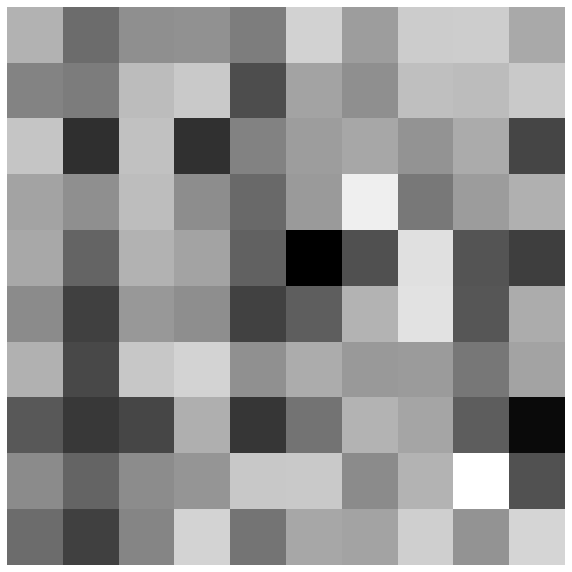

In [ ]:
plot(y2[0:10,:])

In [ ]:
y

tensor([3., 8., 0., 5., 5., 9., 8., 5., 9., 6., 2., 5., 9., 8., 8., 5., 3., 3.,
        8., 8., 1., 6., 0., 8., 9., 1., 3., 6., 0., 5., 9., 0., 8., 2., 9., 2.,
        7., 2., 9., 7., 2., 4., 5., 6., 0., 4., 7., 4., 7., 2., 8., 0., 1., 9.,
        7., 9., 6., 5., 8., 4., 1., 2., 6., 4., 1., 7., 0., 2., 6., 7., 5., 0.,
        1., 8., 6., 0., 7., 6., 4., 8., 7., 7., 6., 7., 2., 7., 4., 1., 0., 2.,
        1., 9., 0., 8., 3., 5., 8., 1., 3., 7., 3., 7., 6., 1., 6., 1., 1., 1.,
        6., 5., 1., 8., 9., 9., 0., 2., 7., 5., 7., 3., 2., 3., 0., 5., 4., 9.,
        1., 5., 3., 6., 3., 6., 6., 8., 4., 1., 7., 9., 3., 4., 4., 5., 3., 8.,
        8., 7., 1., 4., 7., 9., 4., 3., 6., 5., 1., 9., 6., 4., 6., 0., 5., 9.,
        3., 7., 5., 2., 0., 9., 8., 5., 6., 4., 7., 7., 6., 2., 1., 1., 6., 9.,
        7., 8., 2., 3., 6., 2., 4., 1., 2., 0., 7., 4., 9., 9., 1., 2., 4., 9.,
        7., 8., 8., 4., 1., 5., 9., 9., 3., 5., 3., 9., 4., 2., 9., 4., 3., 8.,
        3., 2., 3., 9., 0., 5., 6., 1., 

In [ ]:
one_hot(y)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  """


tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 1., 0.],
        [1., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 1., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [1., 0., 0.,  ..., 0., 0., 0.]], device='cuda:0')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  """


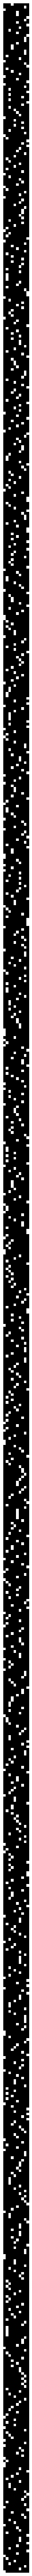

In [ ]:
plot(one_hot(y))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  """


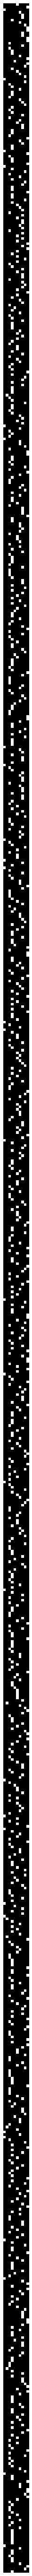

In [ ]:
plot(one_hot(torch.argmax(y2,1)))

In [ ]:
y

tensor([3., 8., 0., 5., 5., 9., 8., 5., 9., 6., 2., 5., 9., 8., 8., 5., 3., 3.,
        8., 8., 1., 6., 0., 8., 9., 1., 3., 6., 0., 5., 9., 0., 8., 2., 9., 2.,
        7., 2., 9., 7., 2., 4., 5., 6., 0., 4., 7., 4., 7., 2., 8., 0., 1., 9.,
        7., 9., 6., 5., 8., 4., 1., 2., 6., 4., 1., 7., 0., 2., 6., 7., 5., 0.,
        1., 8., 6., 0., 7., 6., 4., 8., 7., 7., 6., 7., 2., 7., 4., 1., 0., 2.,
        1., 9., 0., 8., 3., 5., 8., 1., 3., 7., 3., 7., 6., 1., 6., 1., 1., 1.,
        6., 5., 1., 8., 9., 9., 0., 2., 7., 5., 7., 3., 2., 3., 0., 5., 4., 9.,
        1., 5., 3., 6., 3., 6., 6., 8., 4., 1., 7., 9., 3., 4., 4., 5., 3., 8.,
        8., 7., 1., 4., 7., 9., 4., 3., 6., 5., 1., 9., 6., 4., 6., 0., 5., 9.,
        3., 7., 5., 2., 0., 9., 8., 5., 6., 4., 7., 7., 6., 2., 1., 1., 6., 9.,
        7., 8., 2., 3., 6., 2., 4., 1., 2., 0., 7., 4., 9., 9., 1., 2., 4., 9.,
        7., 8., 8., 4., 1., 5., 9., 9., 3., 5., 3., 9., 4., 2., 9., 4., 3., 8.,
        3., 2., 3., 9., 0., 5., 6., 1., 

In [ ]:
torch.argmax(y2,1)

tensor([5, 9, 0, 6, 7, 7, 3, 6, 8, 9, 9, 7, 7, 9, 9, 2, 7, 2, 3, 3, 6, 9, 4, 9,
        8, 3, 5, 6, 8, 0, 8, 2, 3, 6, 3, 3, 2, 6, 7, 8, 3, 2, 3, 7, 2, 6, 5, 7,
        7, 3, 3, 2, 9, 6, 7, 3, 3, 0, 9, 2, 3, 3, 9, 0, 3, 8, 2, 6, 3, 8, 7, 3,
        3, 9, 3, 3, 8, 3, 5, 6, 7, 2, 7, 5, 7, 7, 6, 7, 2, 7, 5, 7, 5, 9, 7, 9,
        5, 3, 5, 8, 5, 2, 3, 7, 5, 7, 7, 2, 7, 8, 7, 5, 9, 5, 3, 6, 7, 2, 4, 3,
        6, 2, 3, 7, 3, 3, 3, 6, 5, 7, 5, 3, 2, 5, 5, 3, 7, 2, 5, 6, 3, 2, 3, 9,
        3, 8, 7, 3, 7, 3, 3, 3, 1, 2, 3, 8, 3, 3, 2, 3, 6, 7, 5, 7, 0, 6, 2, 3,
        2, 0, 6, 6, 8, 2, 9, 9, 3, 3, 2, 3, 8, 2, 9, 6, 3, 2, 2, 7, 6, 8, 3, 6,
        3, 3, 5, 2, 7, 7, 7, 9, 3, 3, 6, 6, 7, 6, 2, 5, 5, 6, 2, 6, 3, 7, 2, 3,
        3, 3, 2, 7, 2, 2, 2, 3, 7, 7, 3, 8, 3, 7, 5, 3, 6, 3, 8, 5, 4, 3, 3, 6,
        3, 2, 7, 9, 2, 7, 2, 3, 5, 3, 3, 7, 8, 4, 5, 3, 3, 3, 2, 3, 9, 7, 2, 2,
        2, 7, 6, 2, 3, 7, 8, 6, 4, 3, 3, 2, 2, 9, 9, 6, 3, 3, 8, 6, 3, 8, 3, 3,
        3, 0, 6, 7, 3, 7, 7, 3, 0, 2, 3,

In [ ]:
b

1000

In [ ]:
torch.sum(y == torch.argmax(y2,1))/b

tensor(0.0760, device='cuda:0')

In [ ]:
X.shape

torch.Size([60000, 784])

In [ ]:
%%timeit
X[20000]@W

50.4 µs ± 8.98 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [ ]:
torch.argmax(X@W,1)

tensor([5, 2, 3,  ..., 2, 2, 5], device='cuda:0')

In [ ]:
Y

tensor([8., 7., 0.,  ..., 0., 4., 9.], device='cuda:0')

In [ ]:
torch.sum(torch.argmax(X@W,1) == Y)/60000

tensor(0.0789, device='cuda:0')

In [ ]:
X@W

tensor([[ -6.7411, -30.6675,  -4.6133,  ..., -18.6603, -21.3336, -11.8581],
        [ -9.2111, -17.2542,   3.0195,  ..., -13.0820, -15.9574,  -3.6528],
        [ -9.9539, -32.6373, -11.0621,  ..., -16.7772, -22.7081, -39.3788],
        ...,
        [-13.9413, -34.4255,  12.8566,  ..., -17.9977, -24.1829, -36.7925],
        [-20.0897, -28.0183,  11.9711,  ..., -14.0910,  -9.7690, -29.2732],
        [ -8.3954, -21.9395,   1.6386,  ..., -20.9600,  -7.4672,  -9.4834]],
       device='cuda:0', grad_fn=<MmBackward0>)

In [ ]:
W.shape

torch.Size([784, 10])

In [ ]:
W[:,0].shape

torch.Size([784])

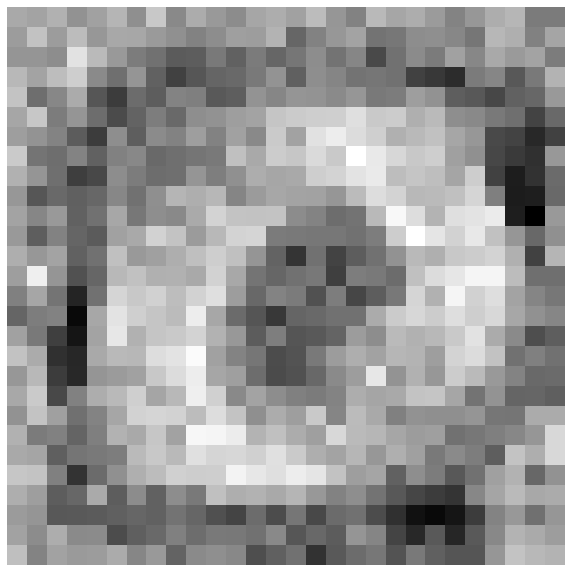

In [ ]:
plot(W[:,0].reshape(28,28))

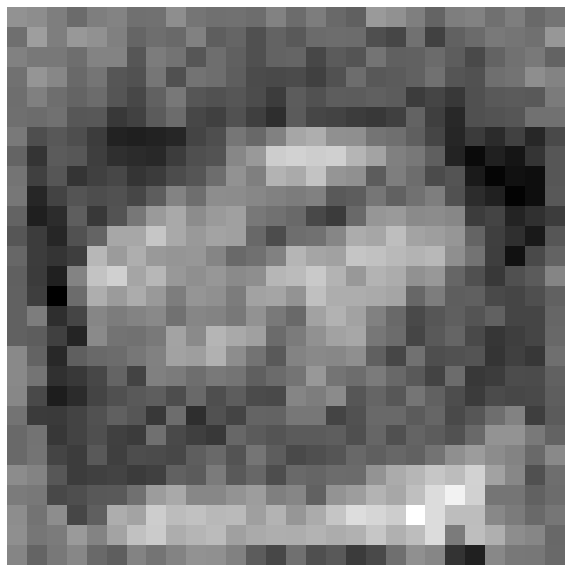

In [ ]:
plot(W[:,9].reshape(28,28))

In [ ]:
W.shape

torch.Size([784, 10])

In [ ]:
(W.T).shape

torch.Size([10, 784])

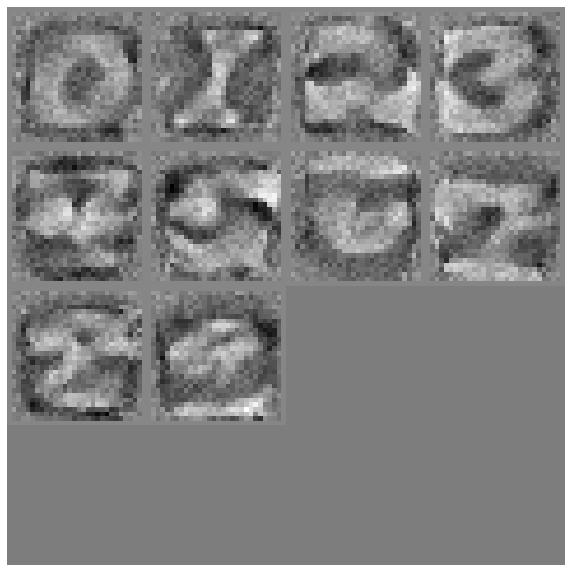

In [ ]:
montage_plot((W.T).reshape(10,28,28).cpu().detach().numpy())

In [ ]:
###################################################

In [ ]:
%%html
<img src ='https://miro.medium.com/max/1906/1*ReYpdIZ3ZSAPb2W8cJpkBg.jpeg'>

In [ ]:
%%html
<img src = 'https://miro.medium.com/max/3648/1*wz59MnXkXdWxrq_fkA2wew.png'>

In [ ]:
def softmax(x):
    s1 = torch.exp(x - torch.max(x,1)[0][:,None])
    s = s1 / s1.sum(1)[:,None]
    return s

In [ ]:
def cross_entropy(outputs, labels):            
    return -torch.sum(softmax(outputs).log()[range(outputs.size()[0]), labels.long()])/outputs.size()[0]  

In [ ]:
%%html
<img src ='https://i.stack.imgur.com/fXqXs.png'>

In [ ]:
def randn_trunc(s): #Truncated Normal Random Numbers
    mu = 0 
    sigma = 0.1
    R = stats.truncnorm((-2*sigma - mu) / sigma, (2*sigma - mu) / sigma, loc=mu, scale=sigma)
    return R.rvs(s)

In [ ]:
def Truncated_Normal(size):

    u1 = torch.rand(size)*(1-np.exp(-2)) + np.exp(-2)
    u2 = torch.rand(size)
    z  = torch.sqrt(-2*torch.log(u1)) * torch.cos(2*np.pi*u2)

    return z

In [ ]:
def acc(out,y):
    with torch.no_grad():
        return (torch.sum(torch.max(out,1)[1] == y).item())/y.shape[0]

In [ ]:
X.shape

torch.Size([60000, 784])

In [ ]:
def get_batch(mode):
    b = c.b
    if mode == "train":
        r = np.random.randint(X.shape[0]-b) 
        x = X[r:r+b,:]
        y = Y[r:r+b]
    elif mode == "test":
        r = np.random.randint(X_test.shape[0]-b)
        x = X_test[r:r+b,:]
        y = Y_test[r:r+b]
    return x,y

In [ ]:
def model(x,w):

    return x@w[0]

In [ ]:
def make_plots():
    
    acc_train = acc(model(x,w),y)
    
    xt,yt = get_batch('test')

    acc_test = acc(model(xt,w),yt)

    wb.log({"acc_train": acc_train, "acc_test": acc_test})

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  


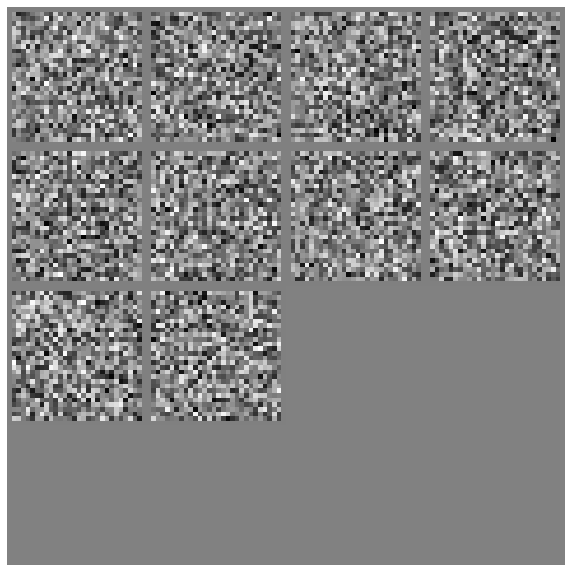

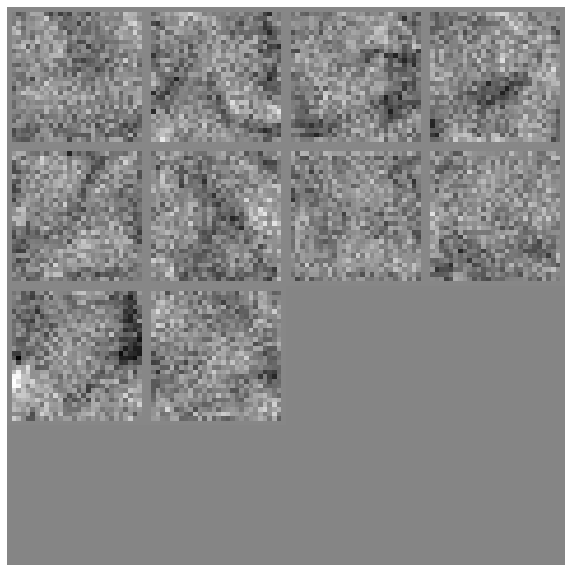

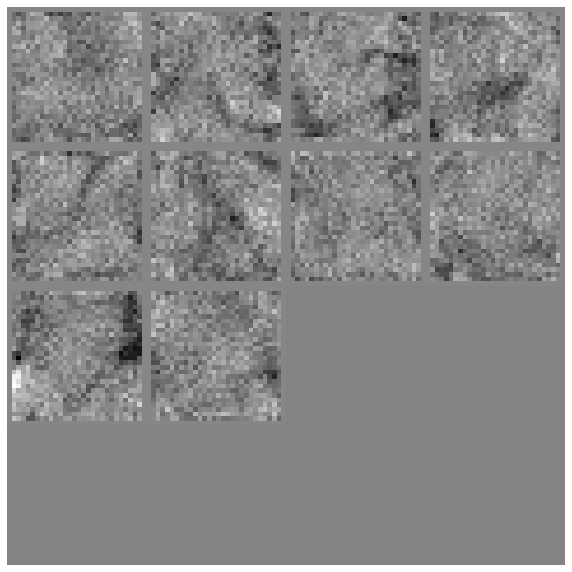

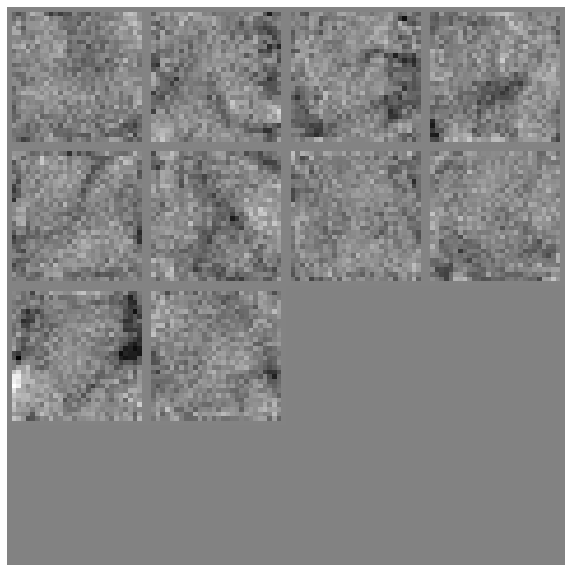

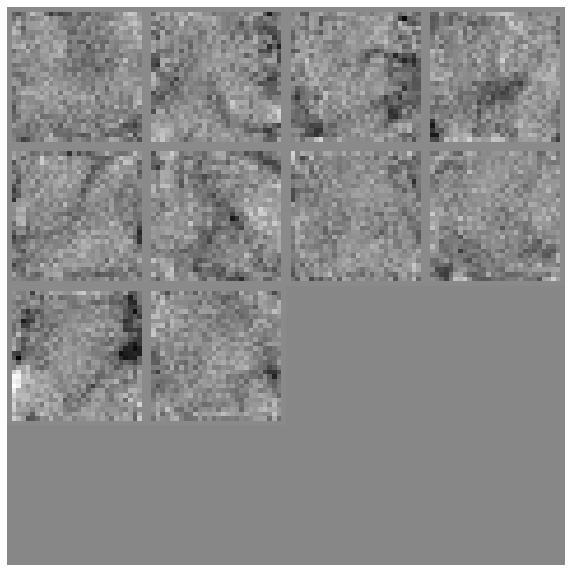

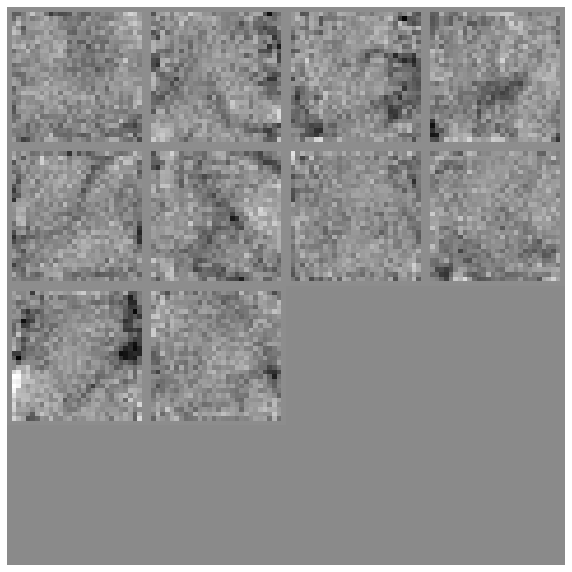

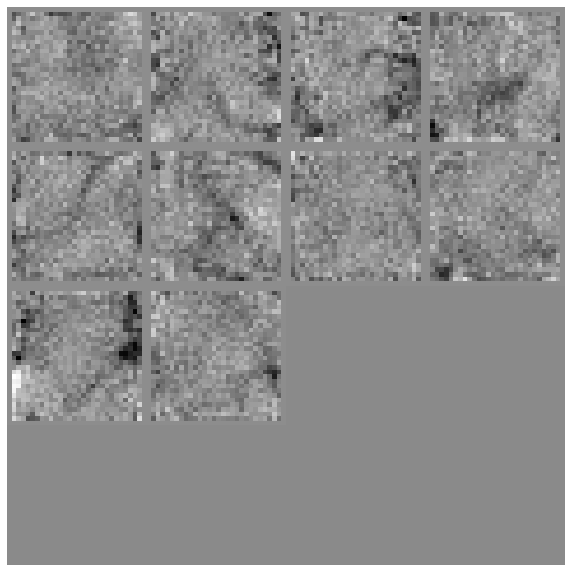

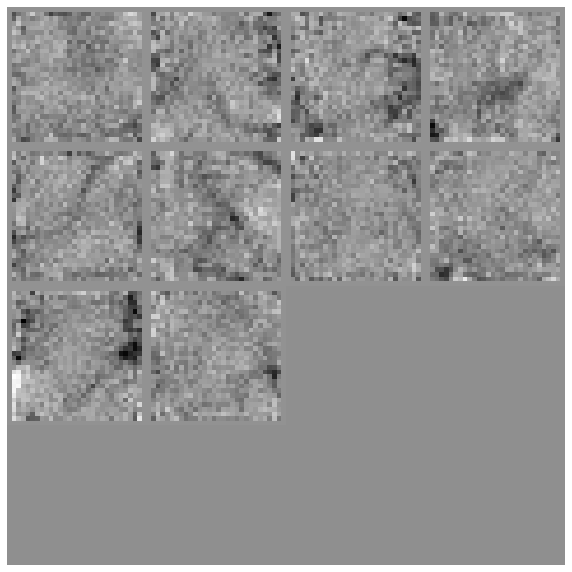

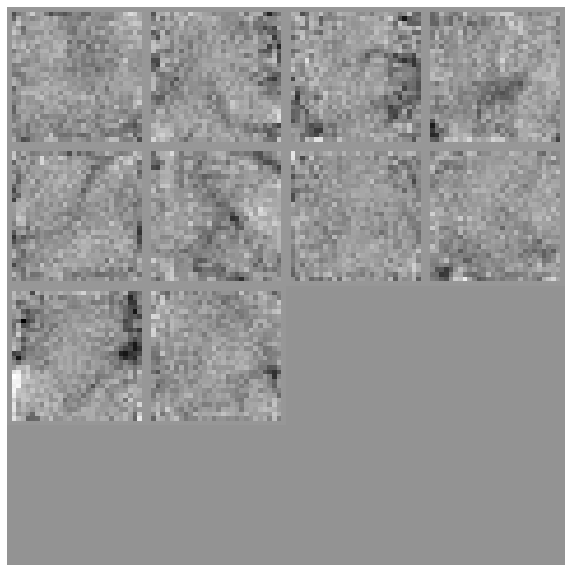

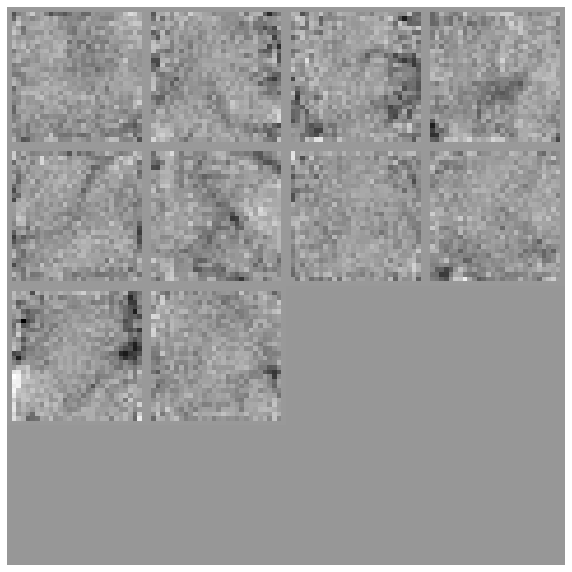

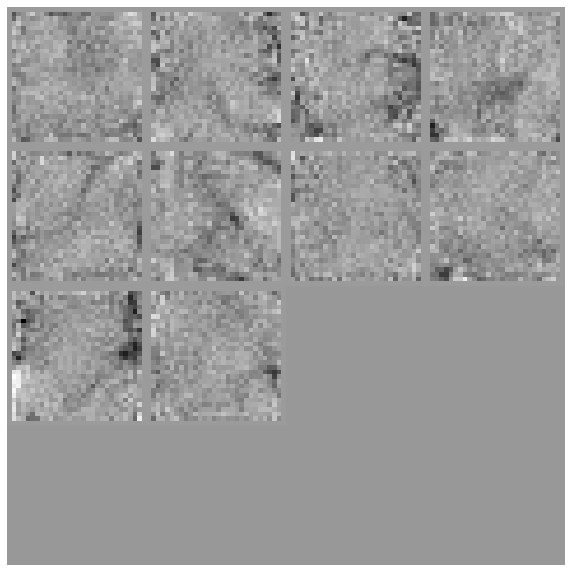

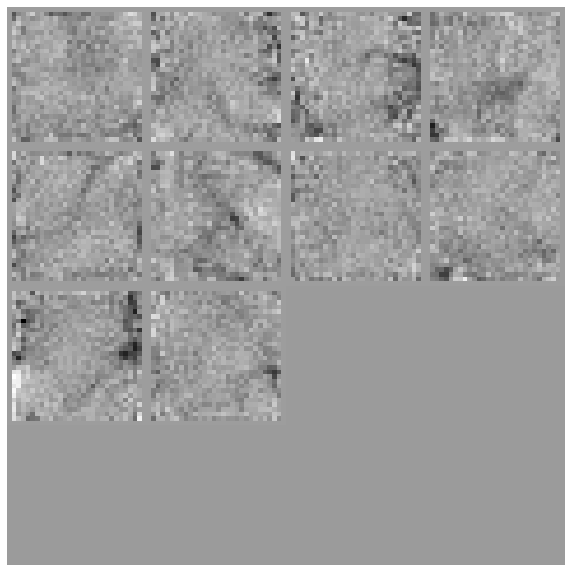

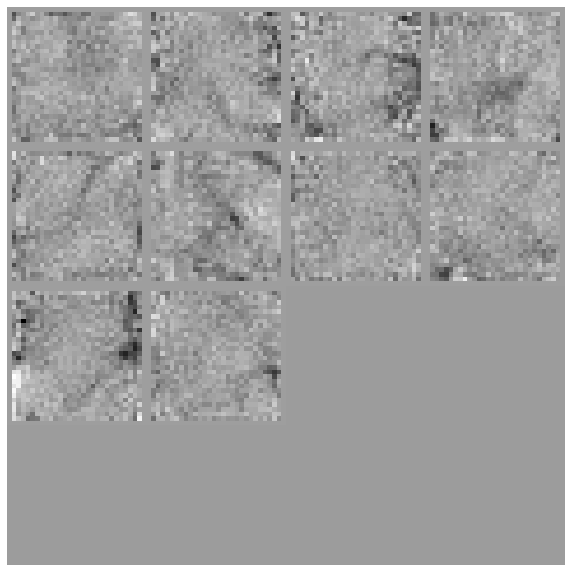

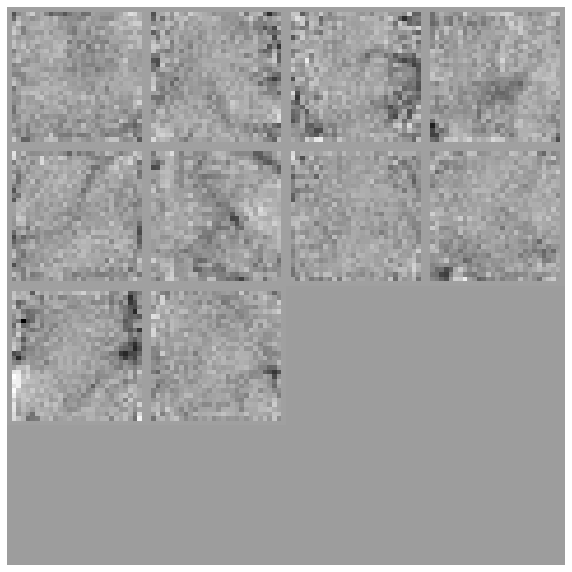

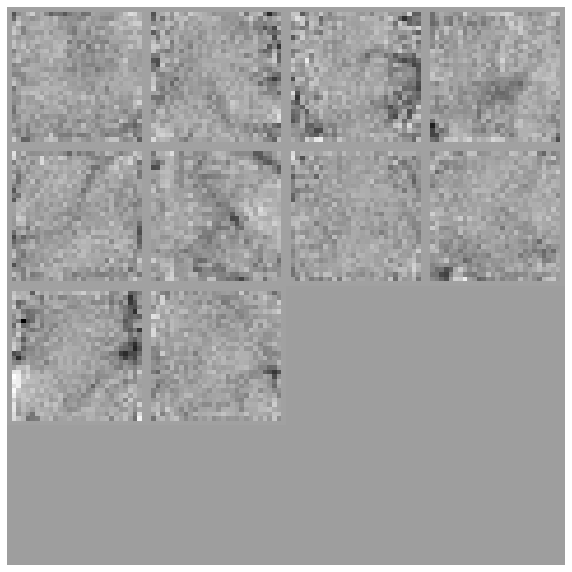

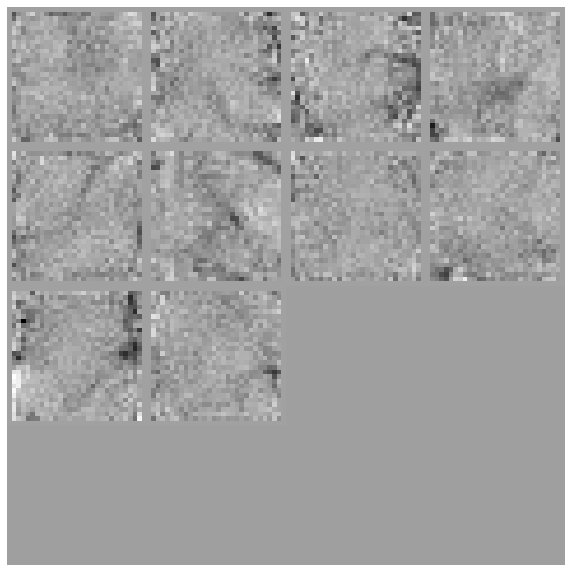

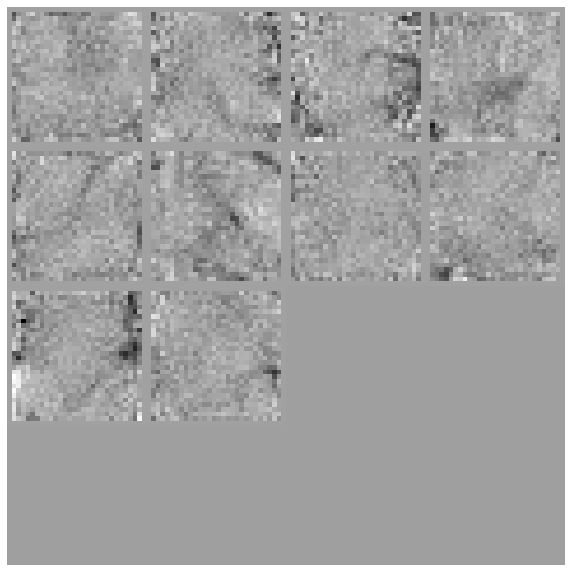

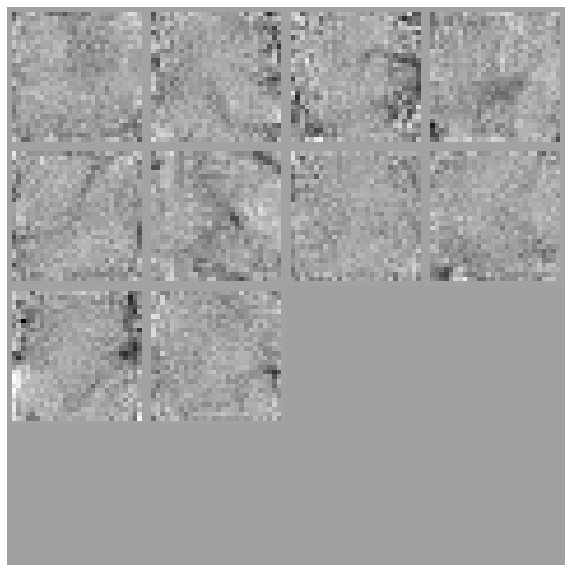

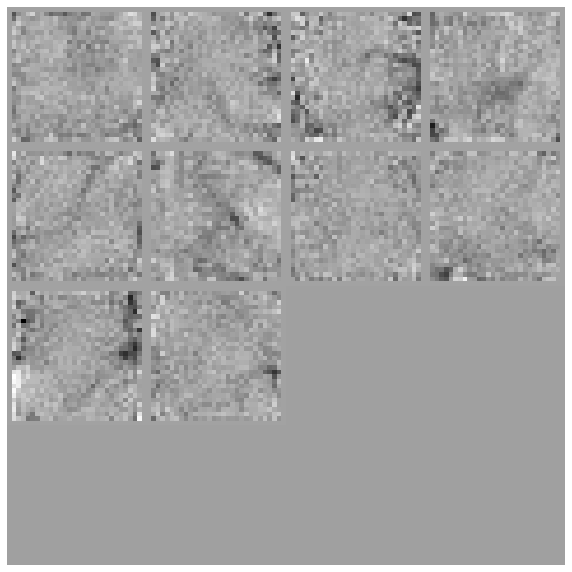

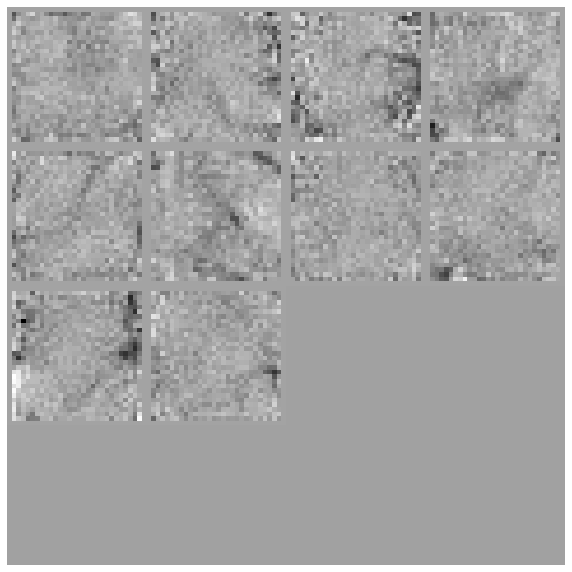

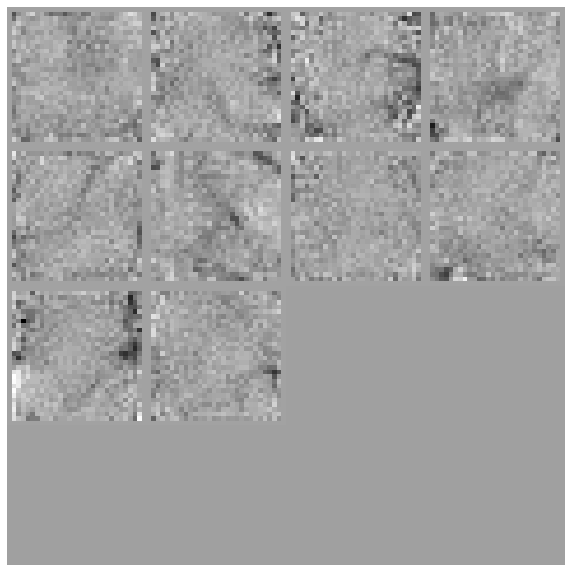

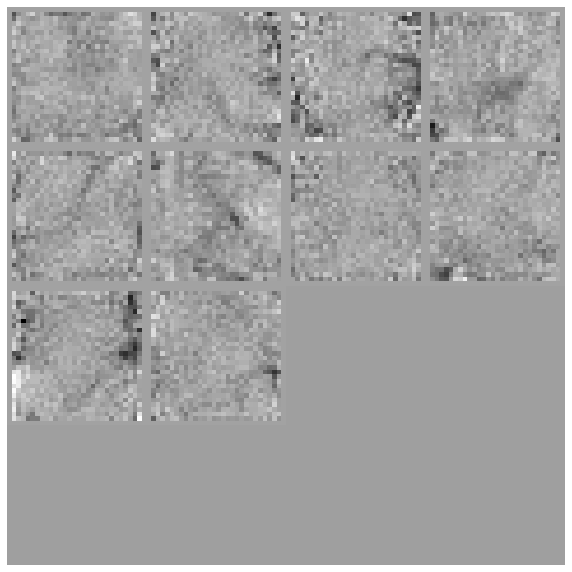

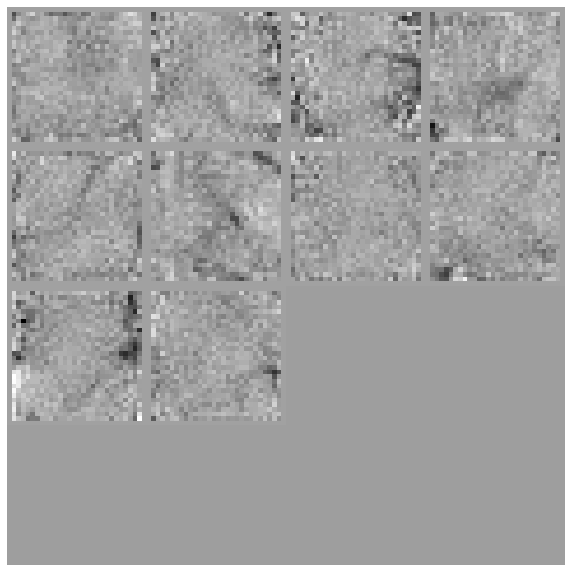

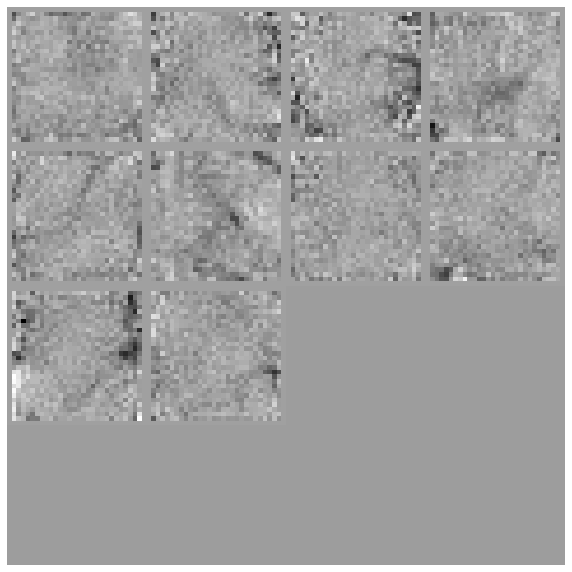

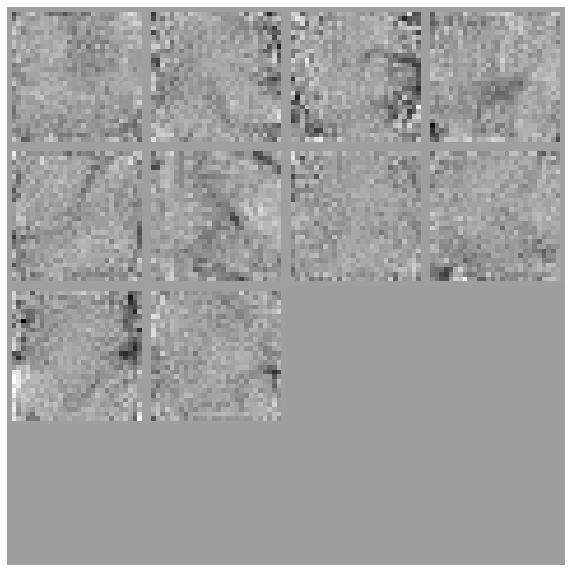

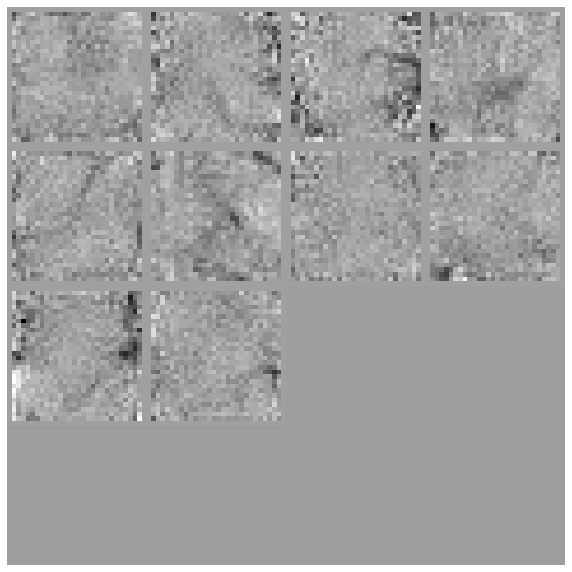

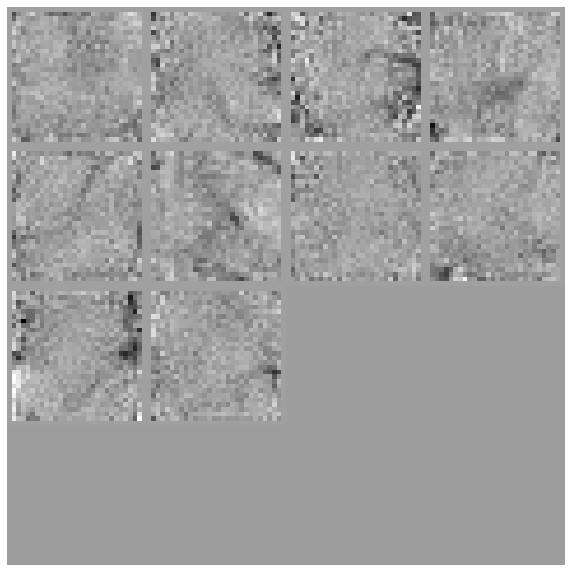

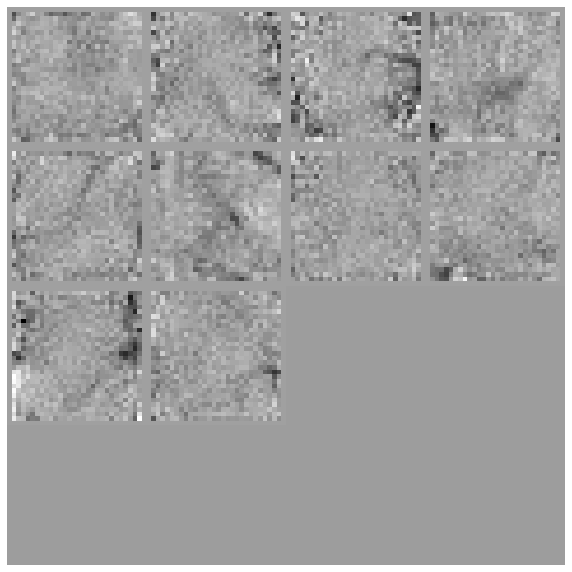

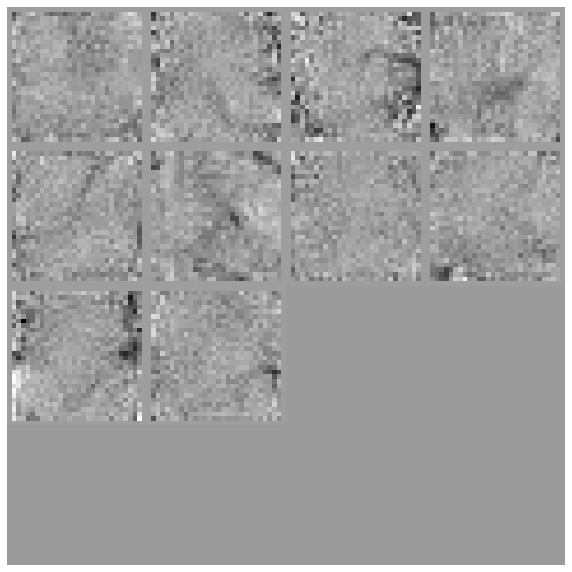

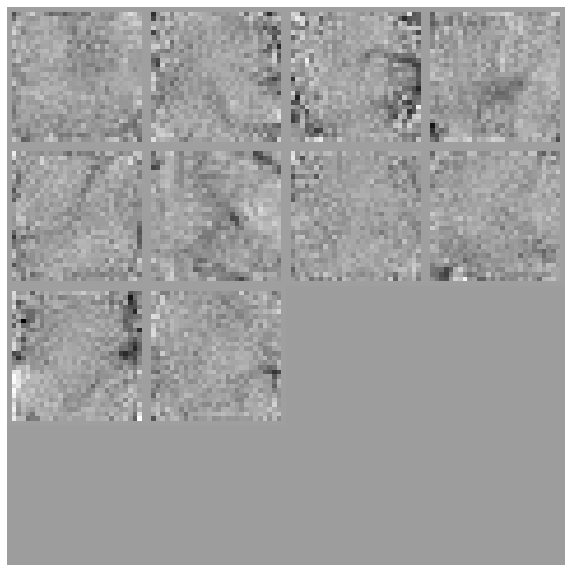

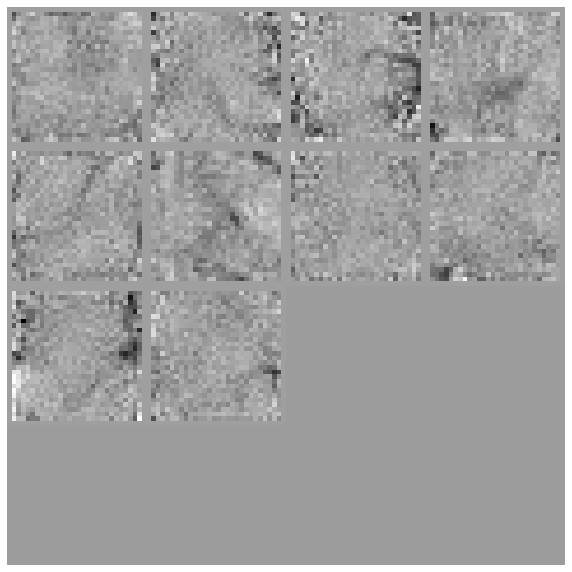

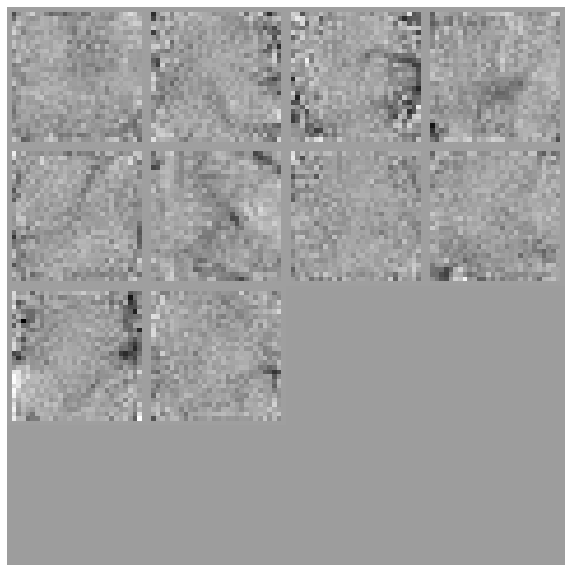

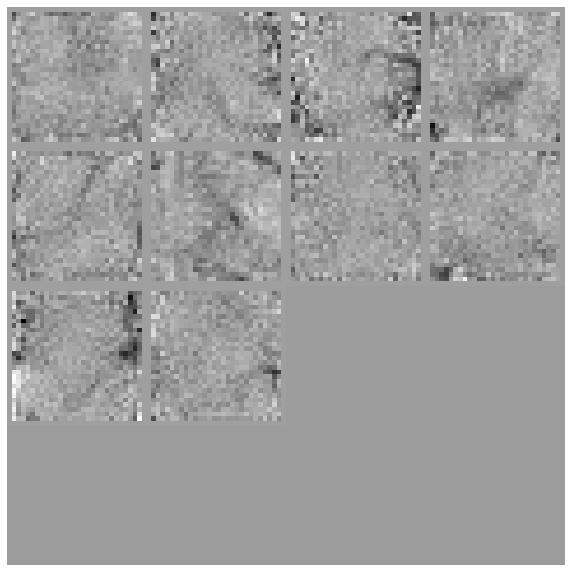

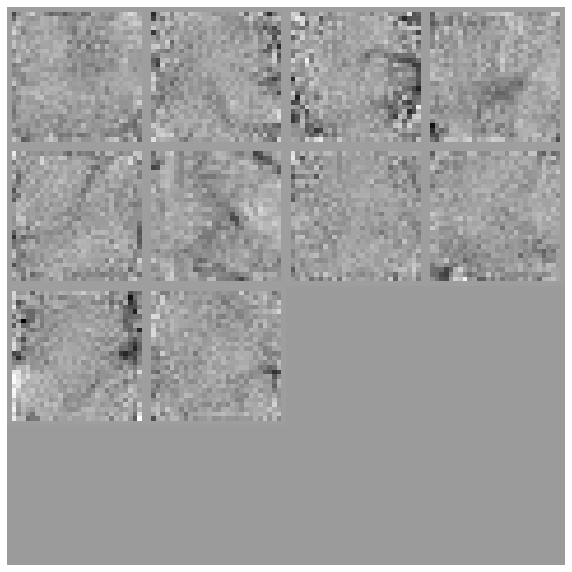

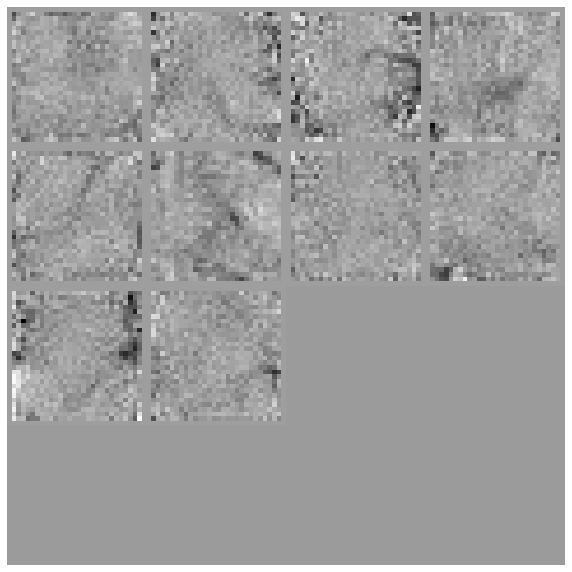

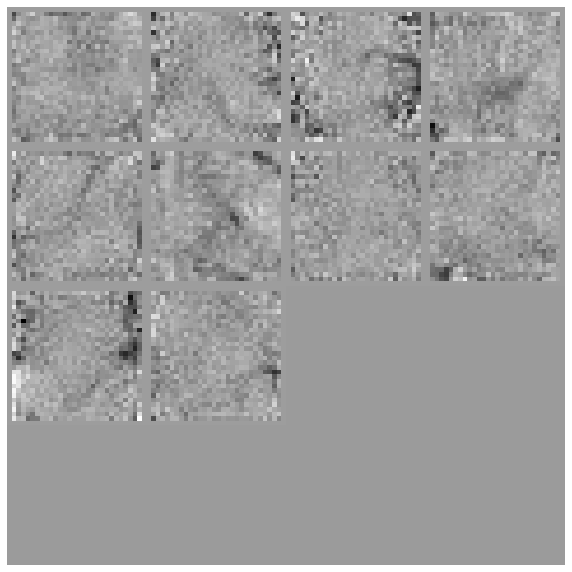

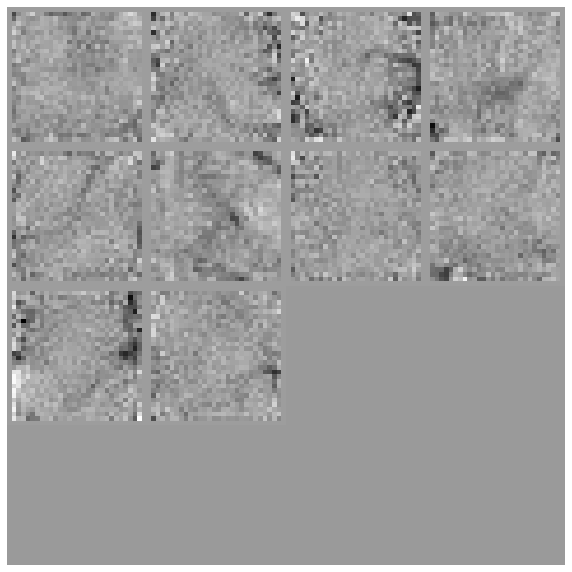

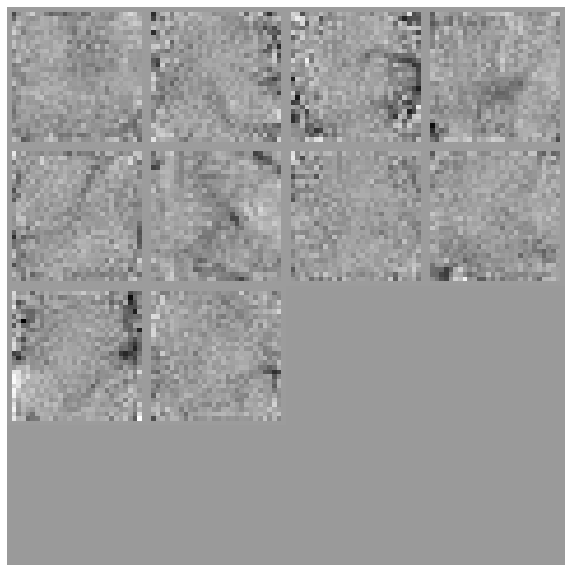

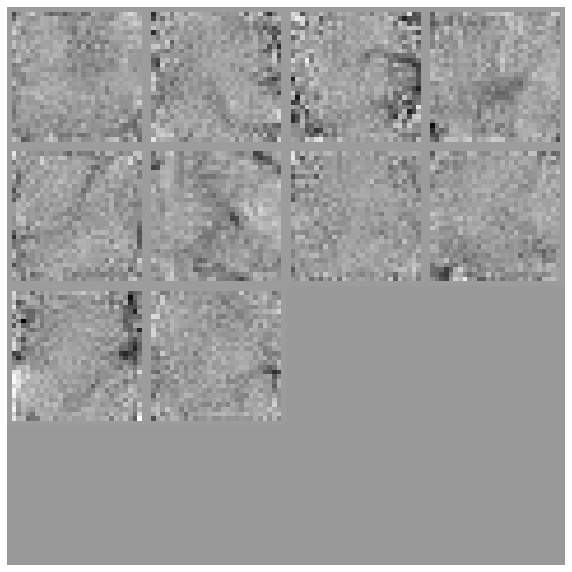

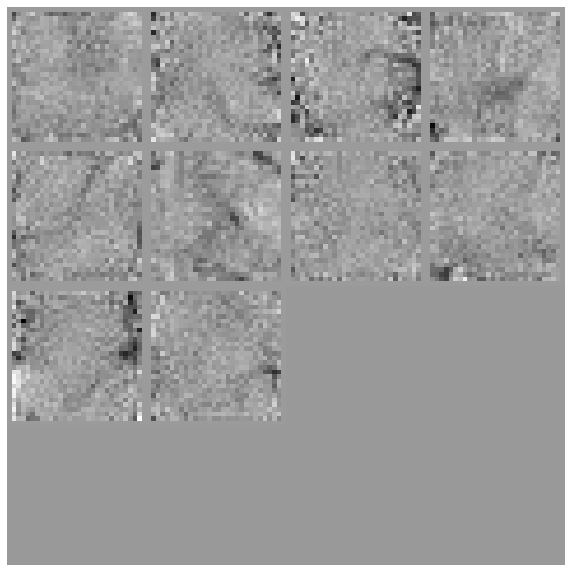

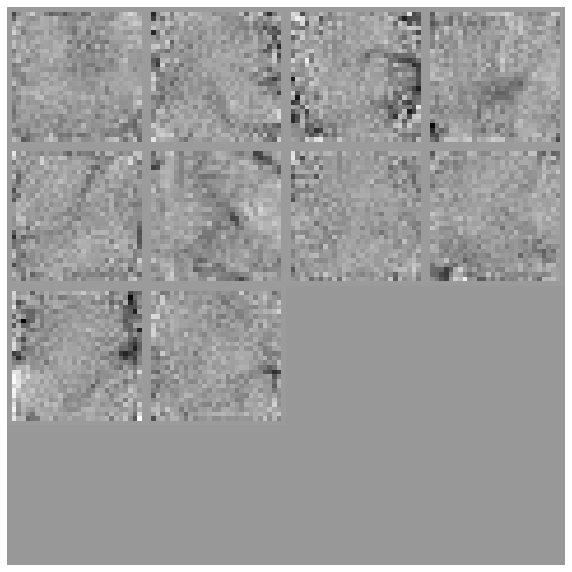

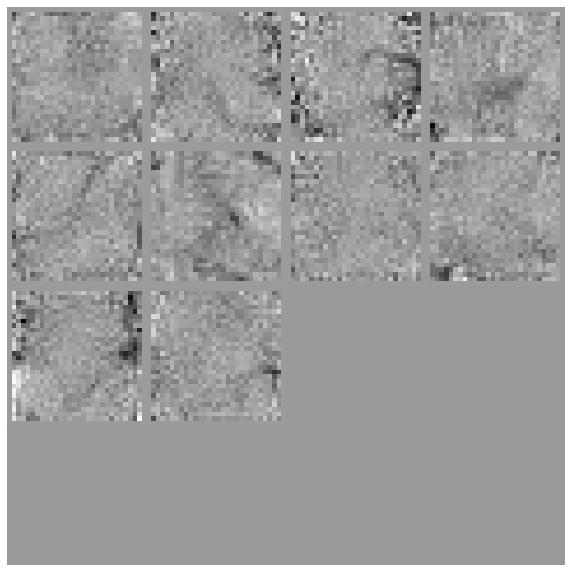

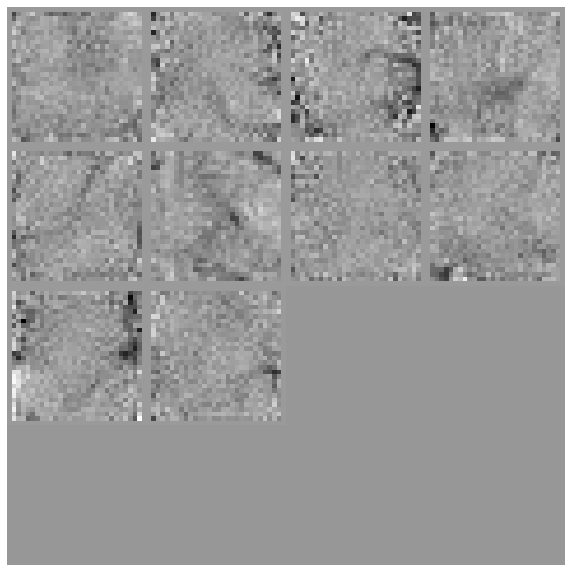

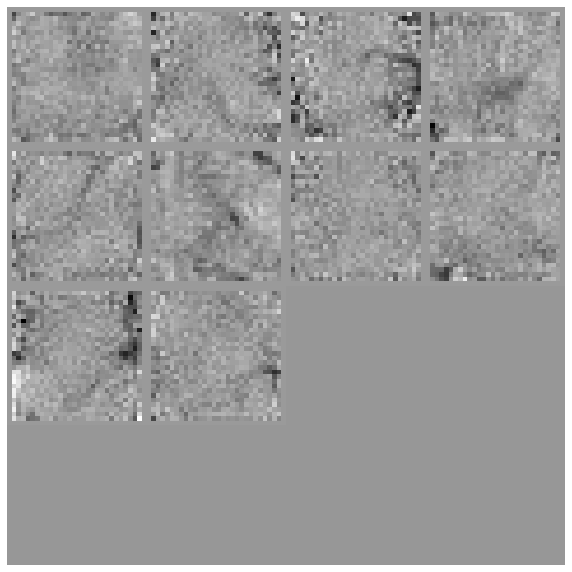

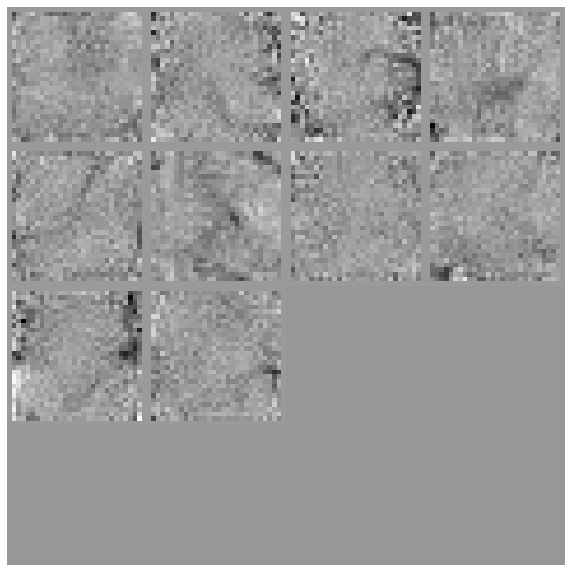

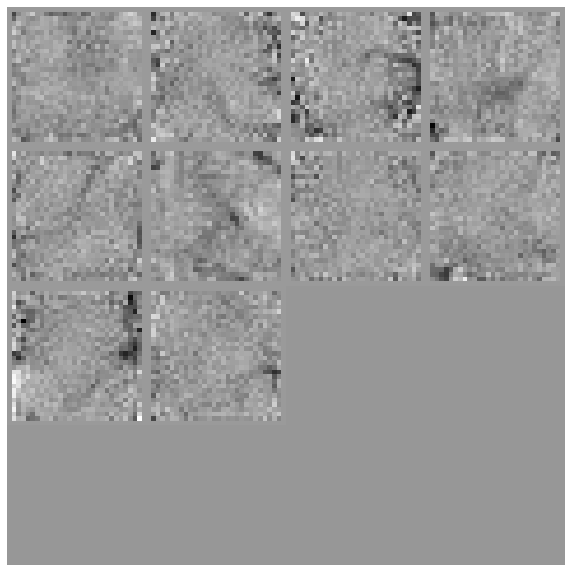

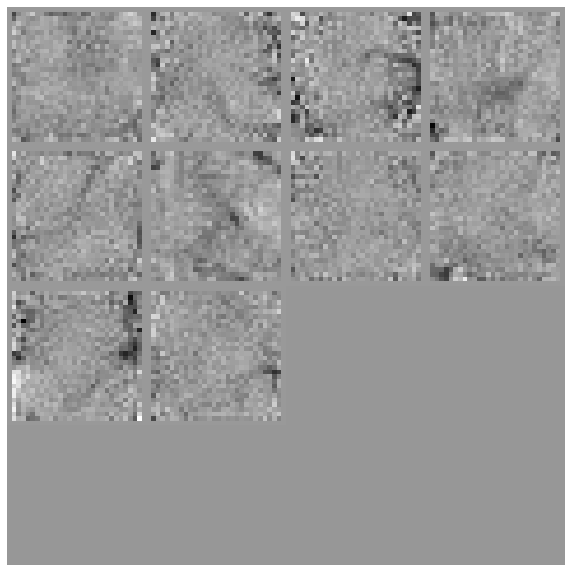

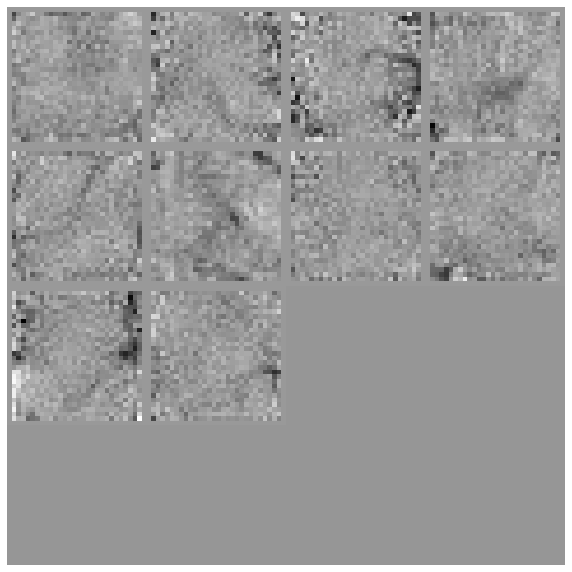

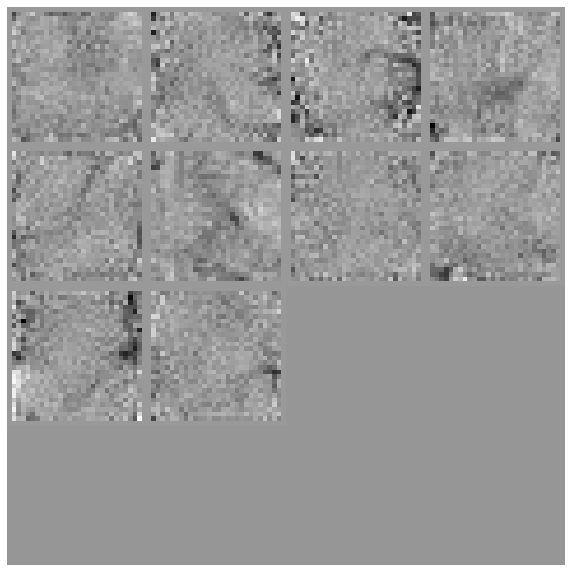

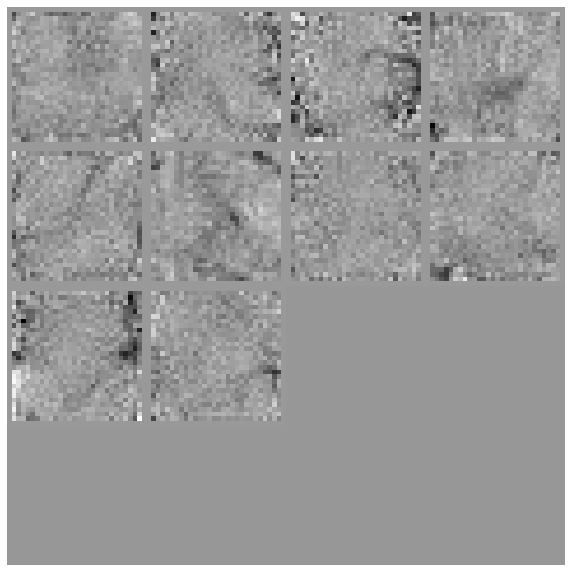

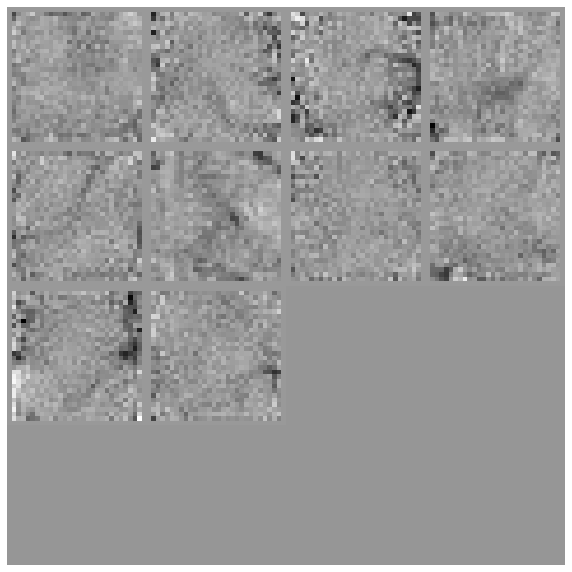

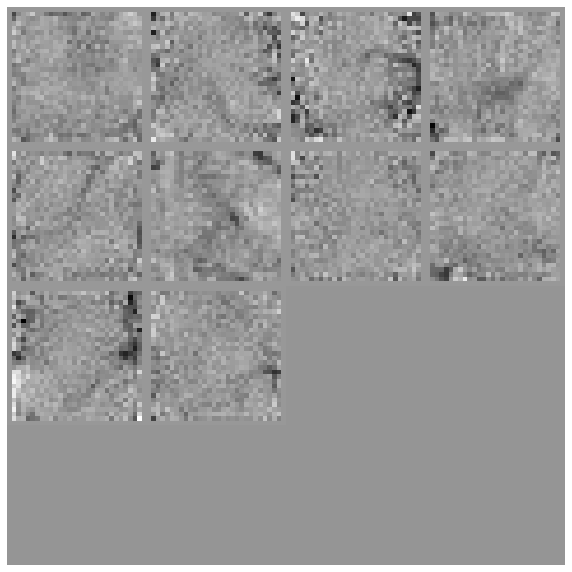

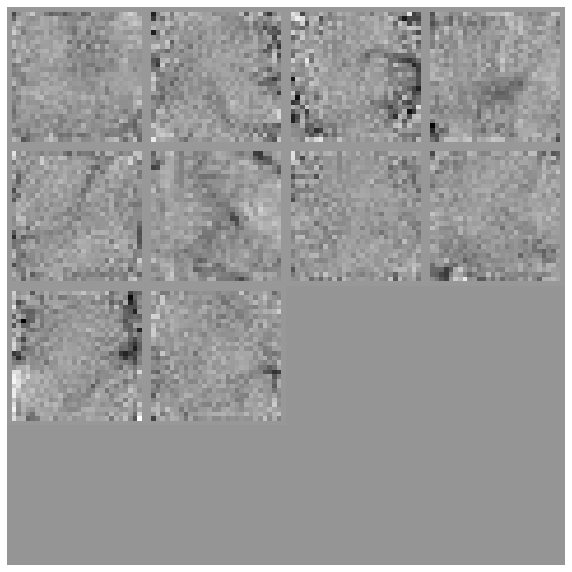

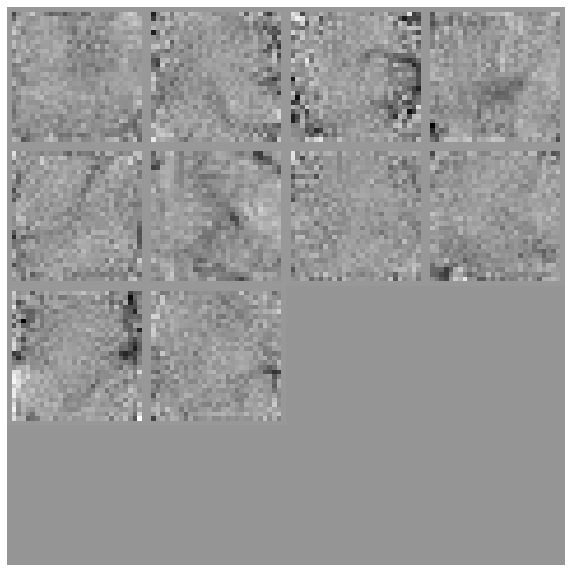

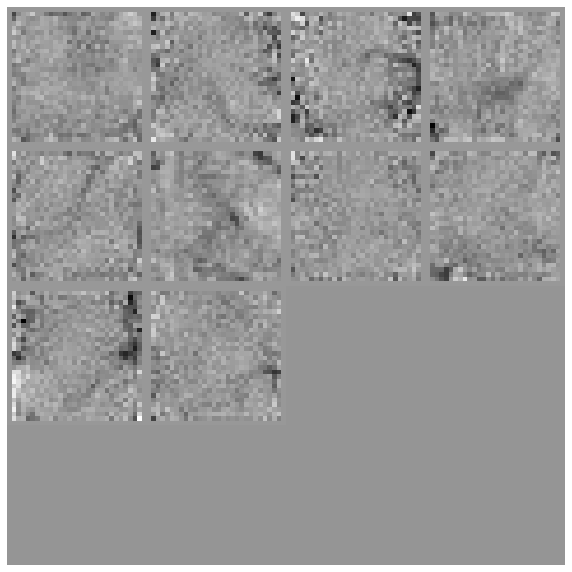

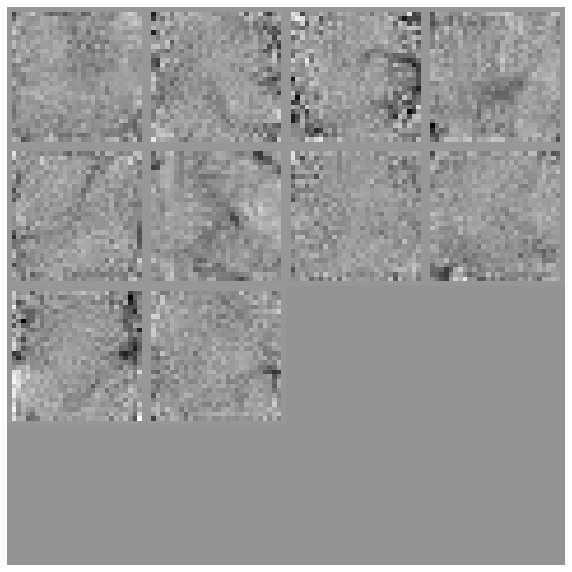

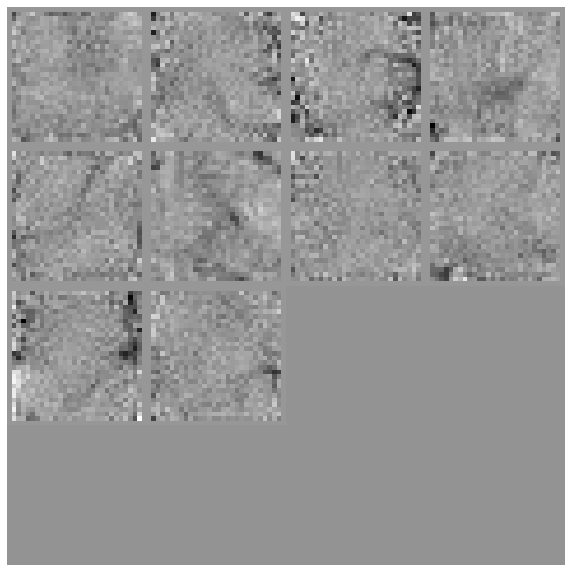

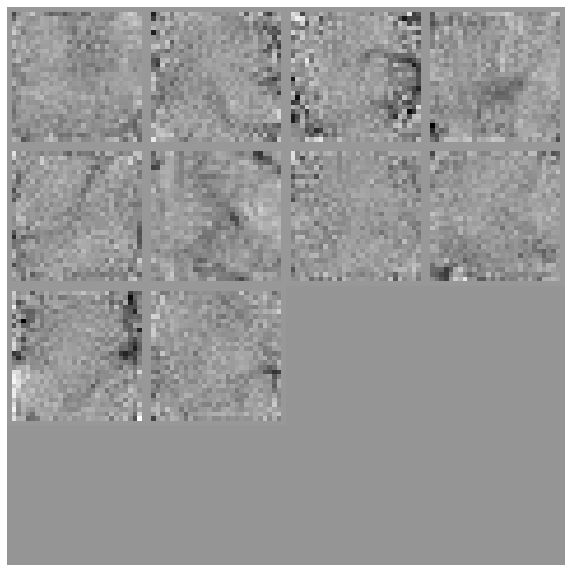

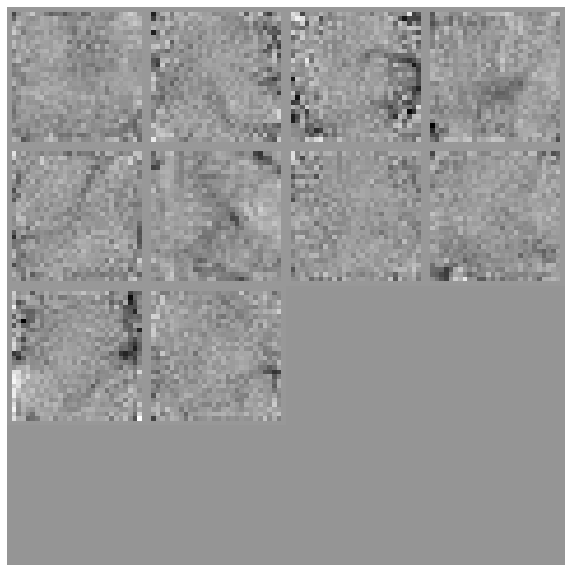

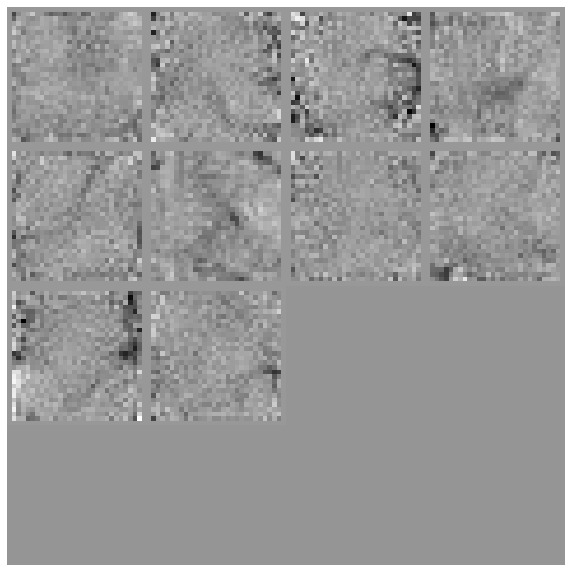

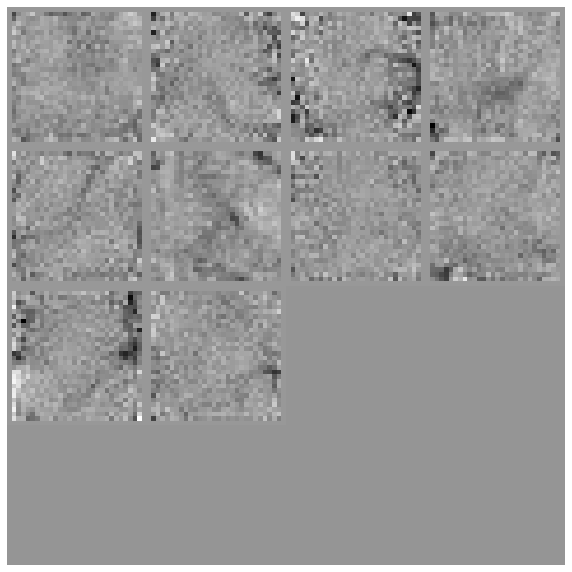

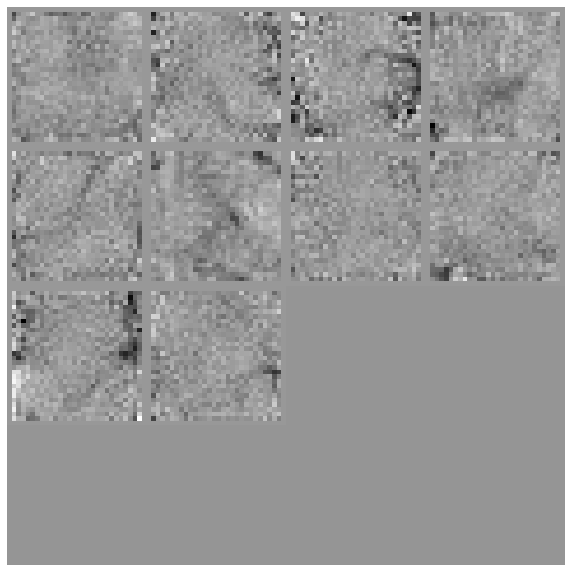

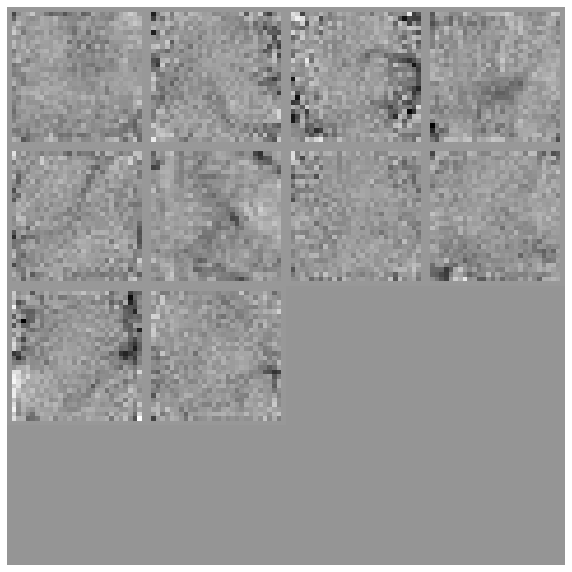

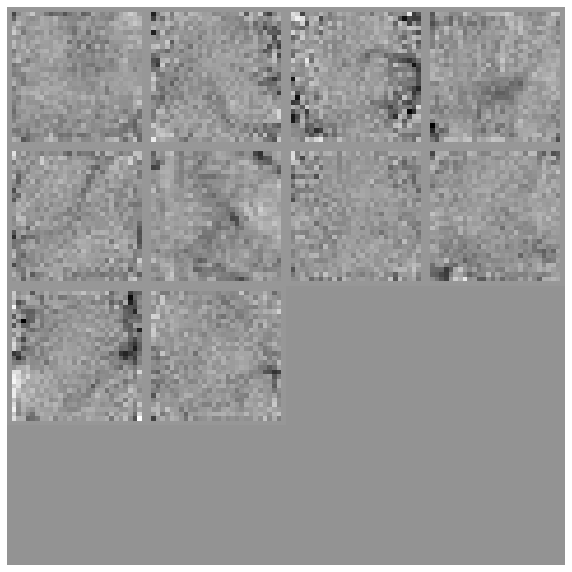

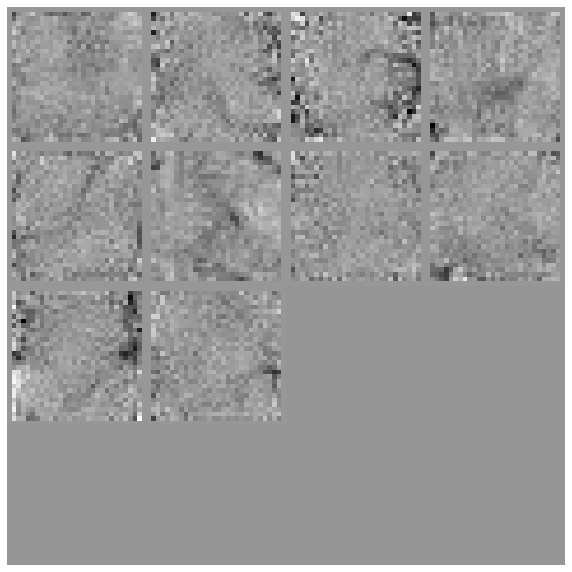

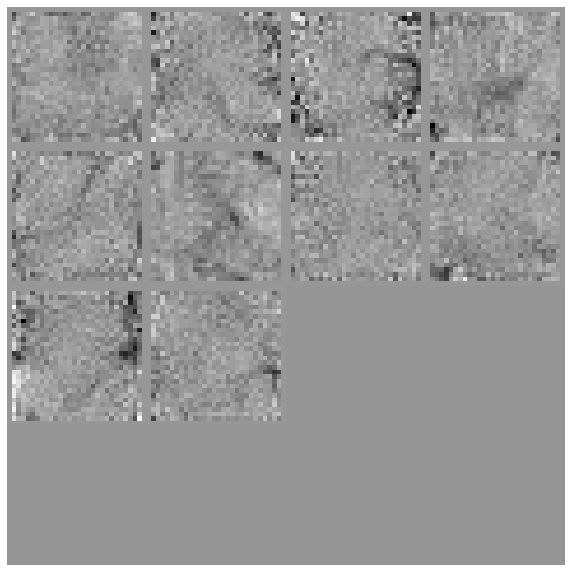

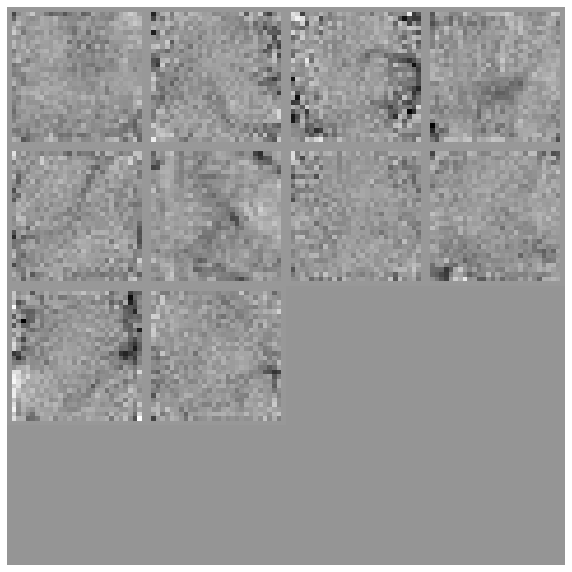

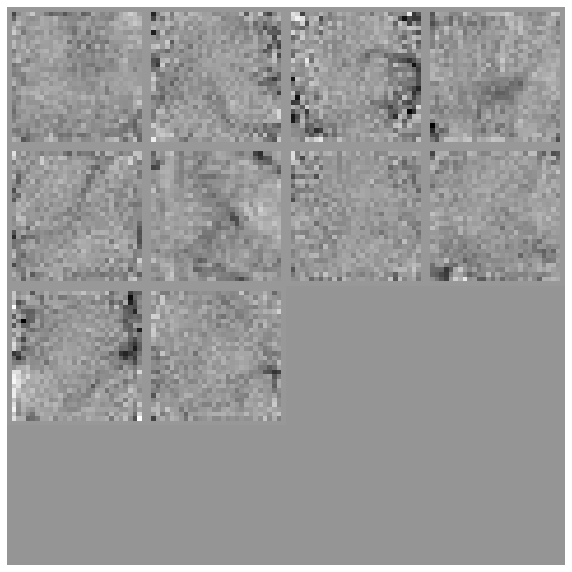

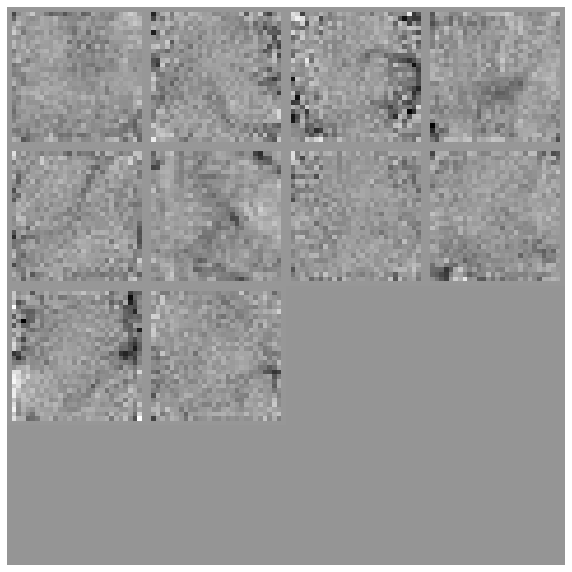

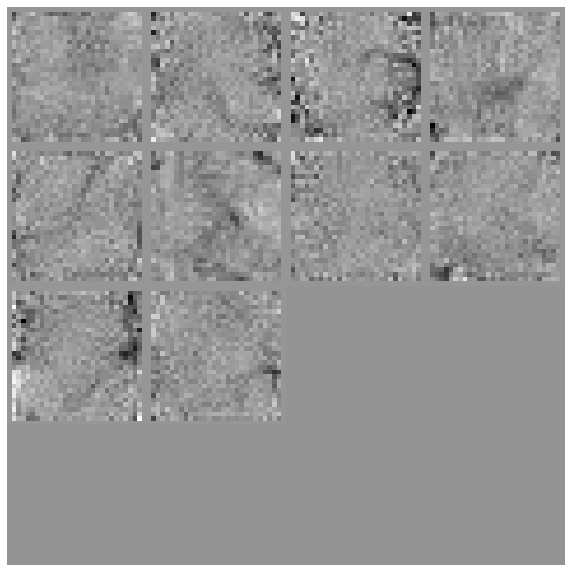

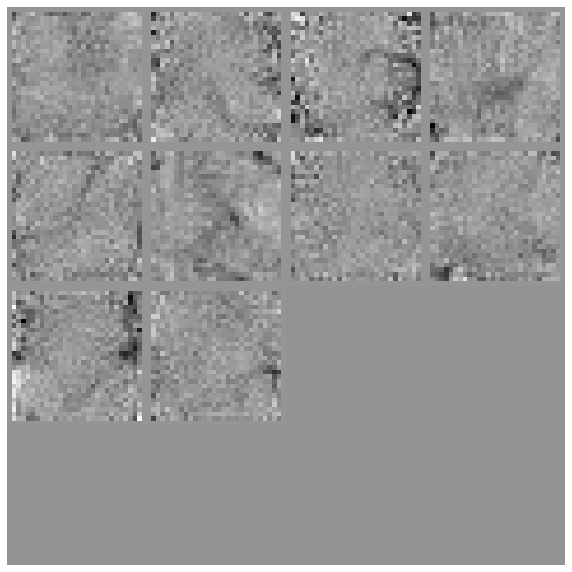

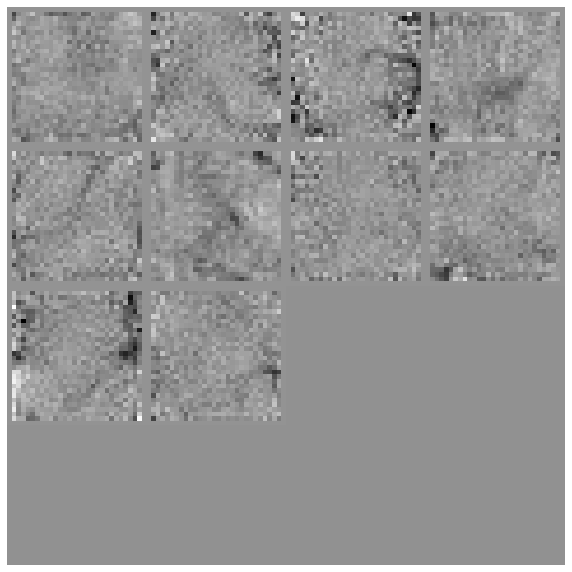

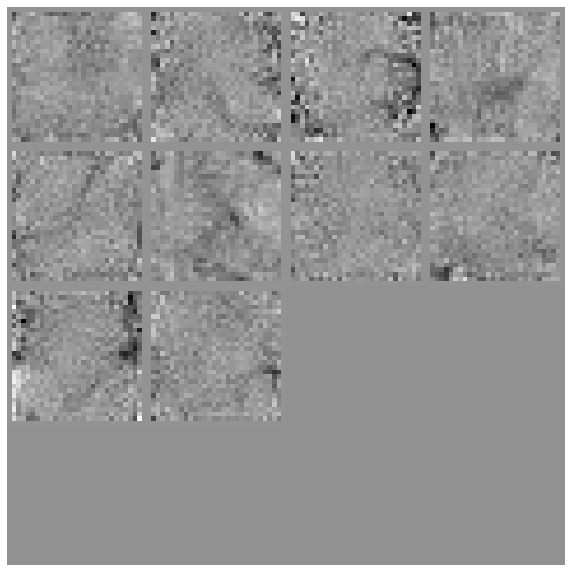

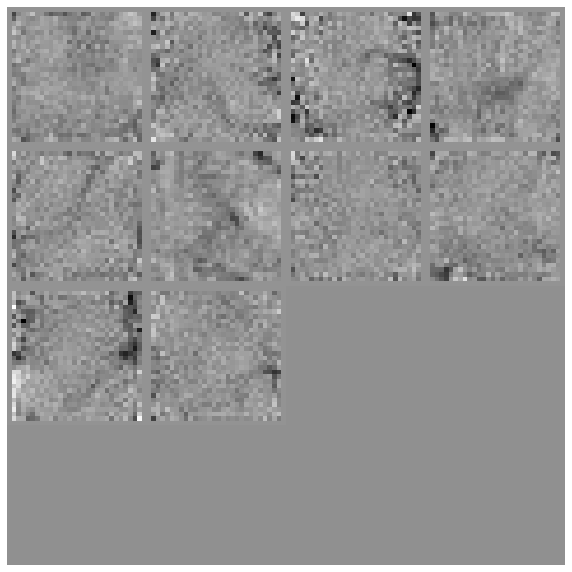

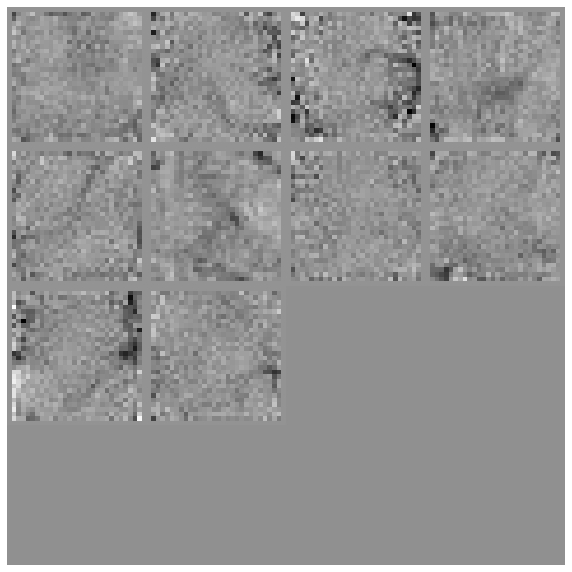

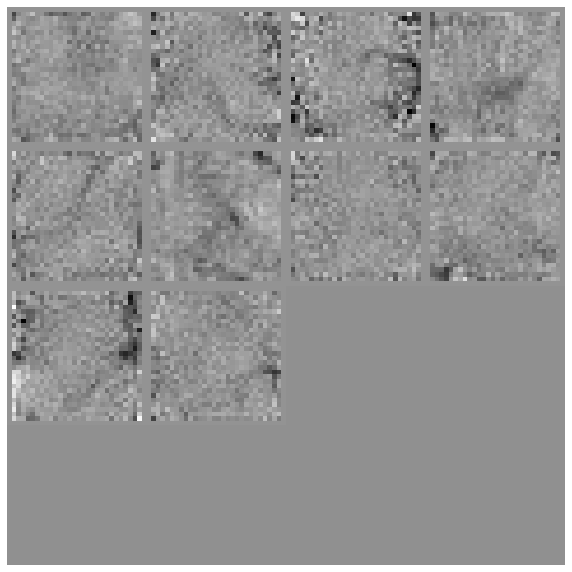

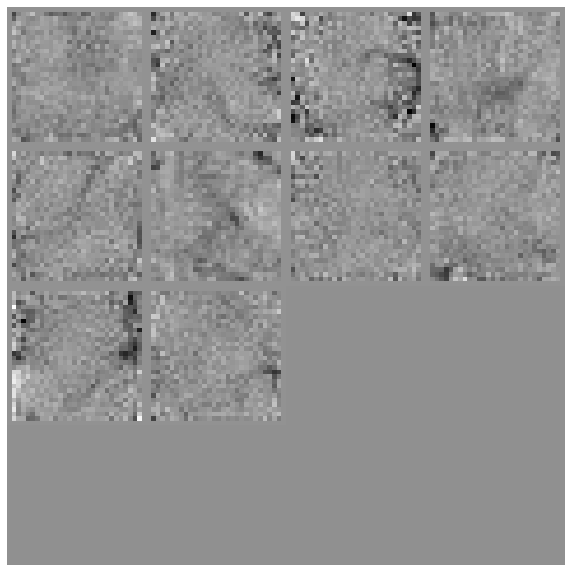

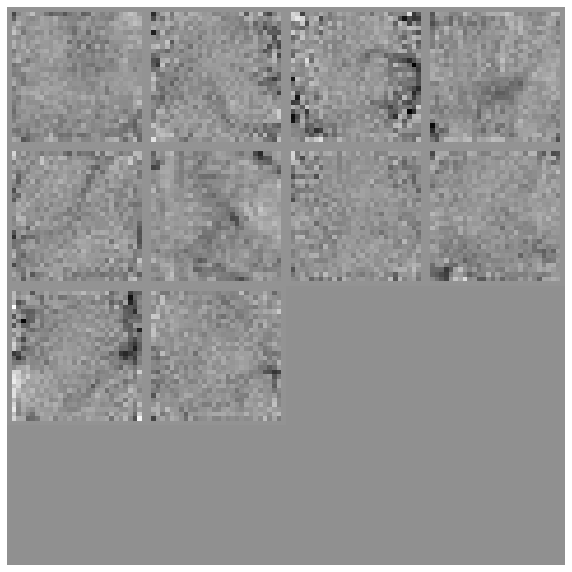

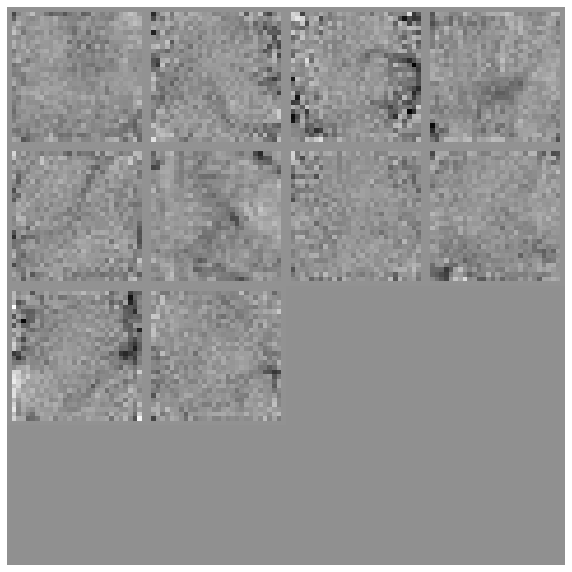

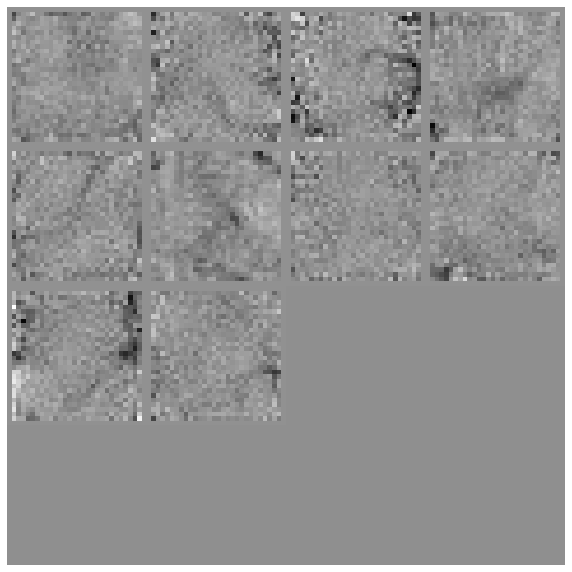

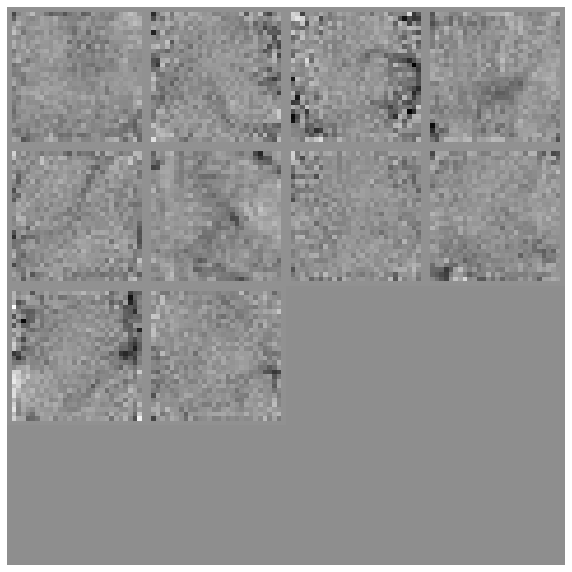

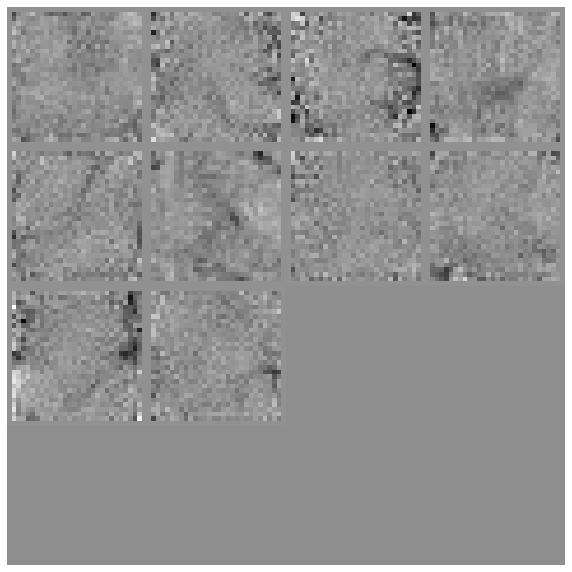

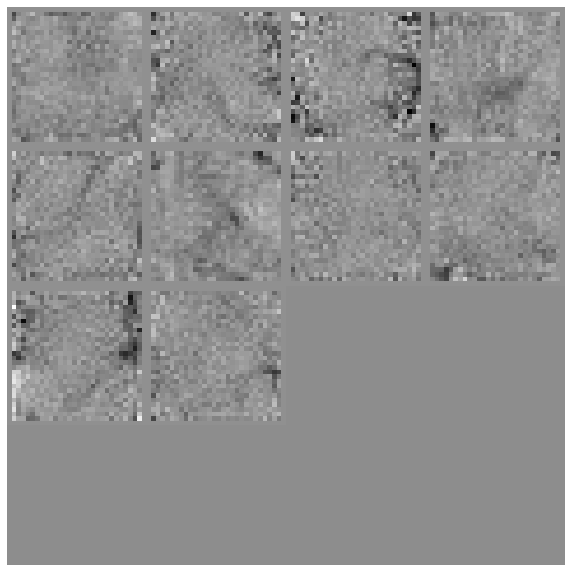

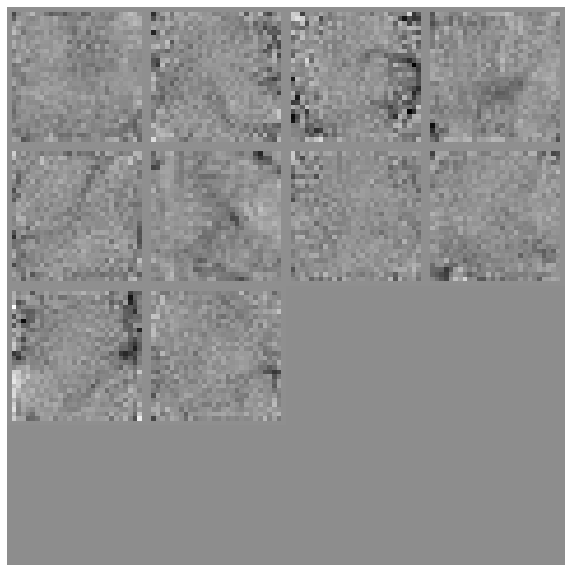

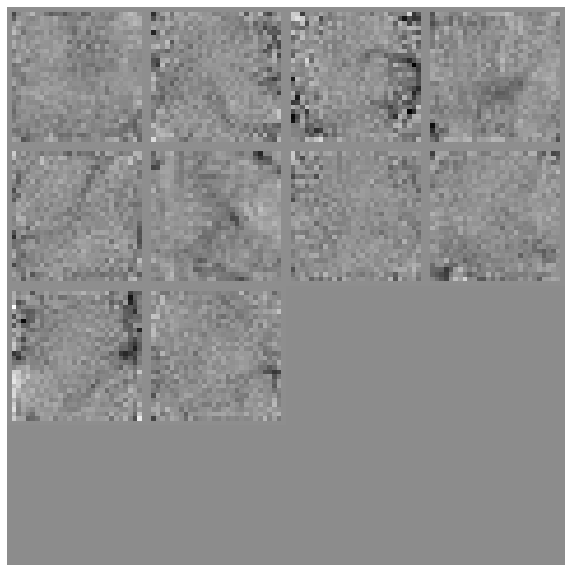

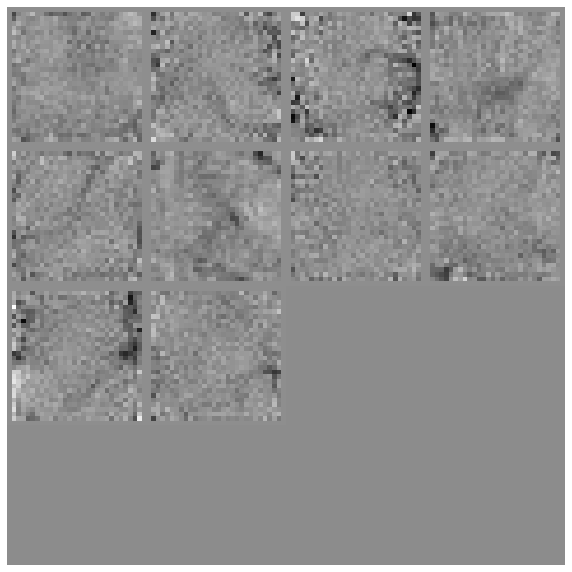

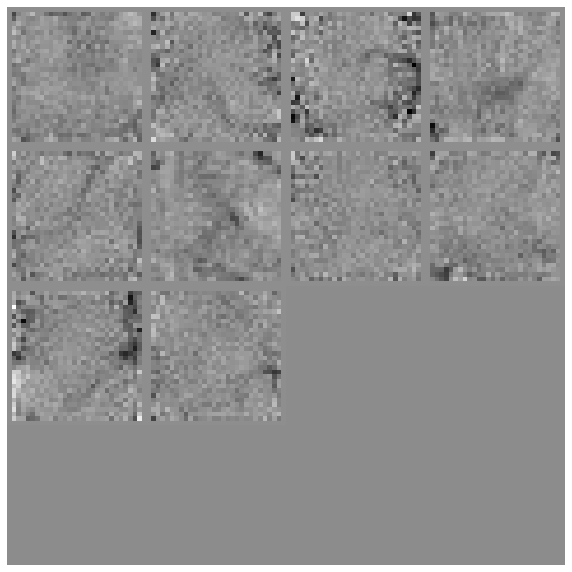

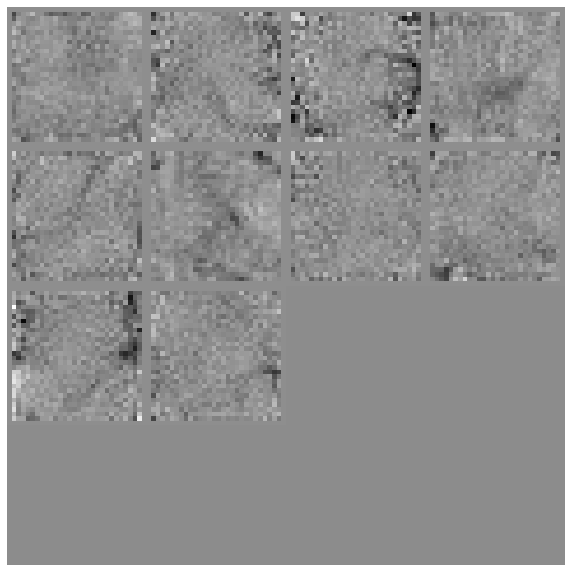

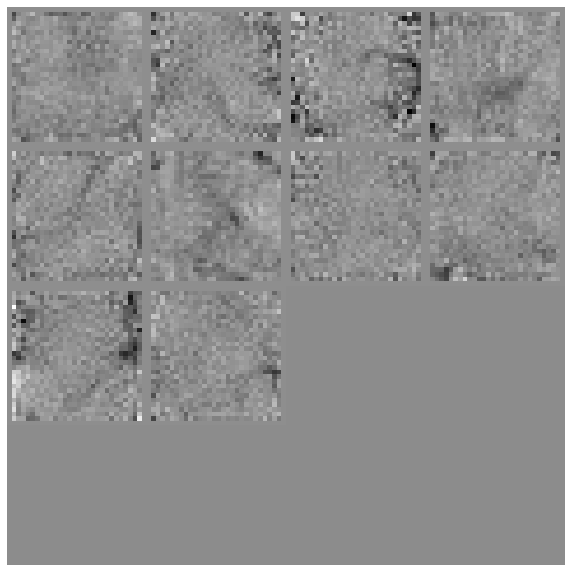

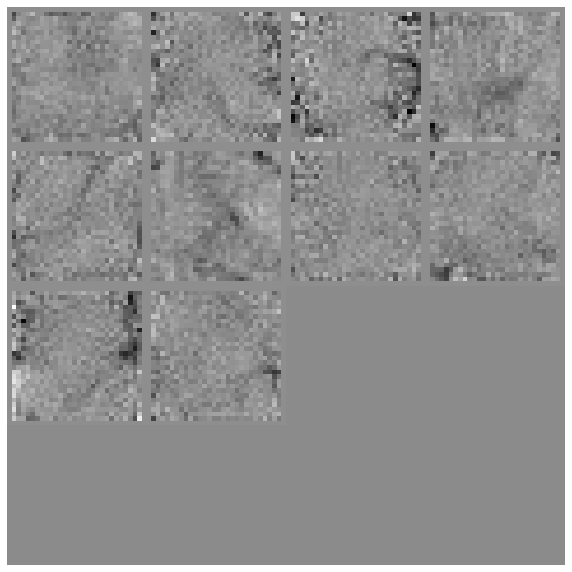

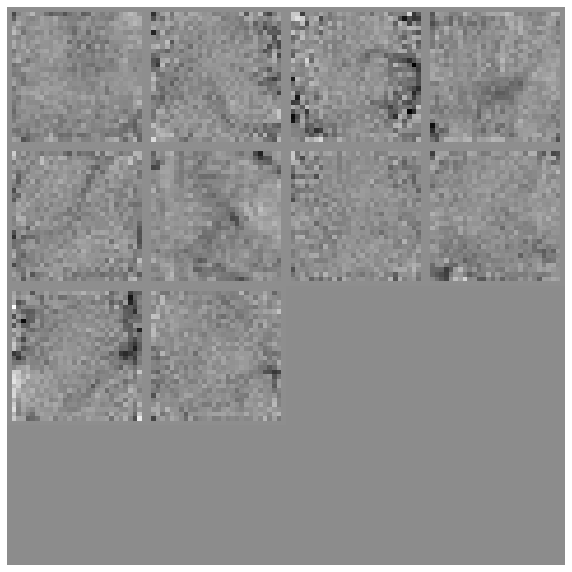

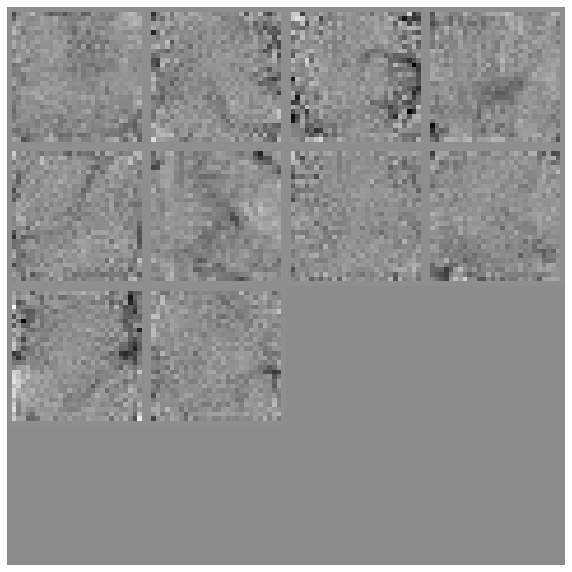

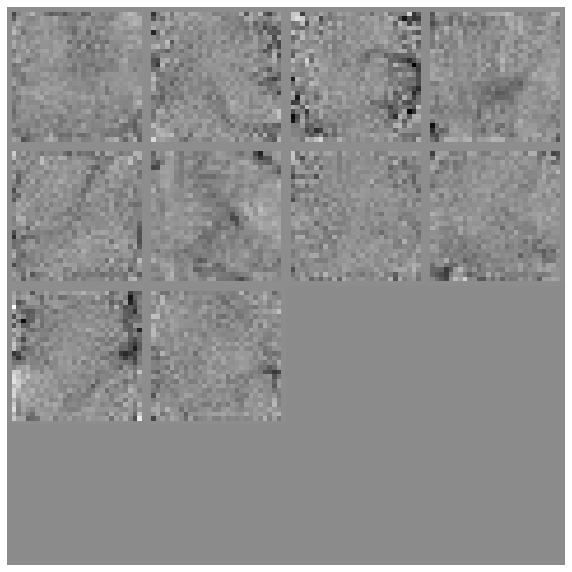

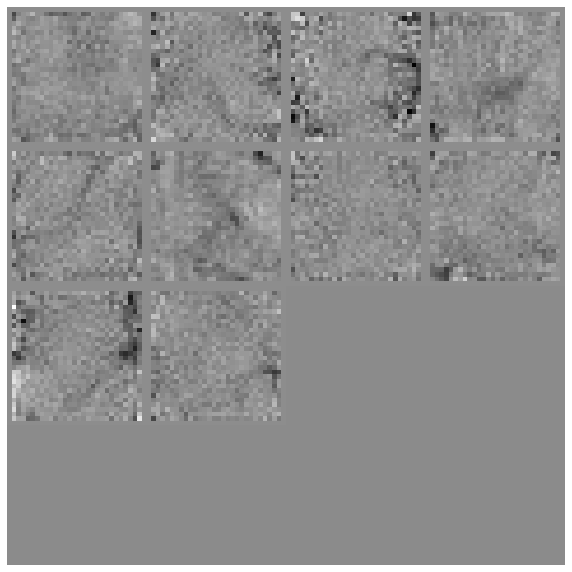

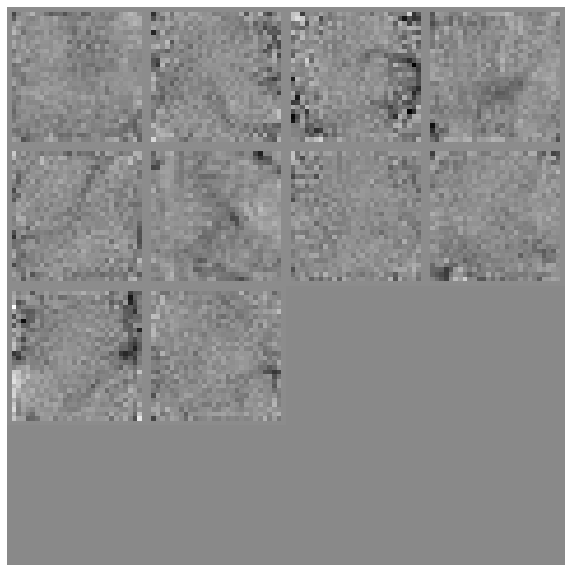

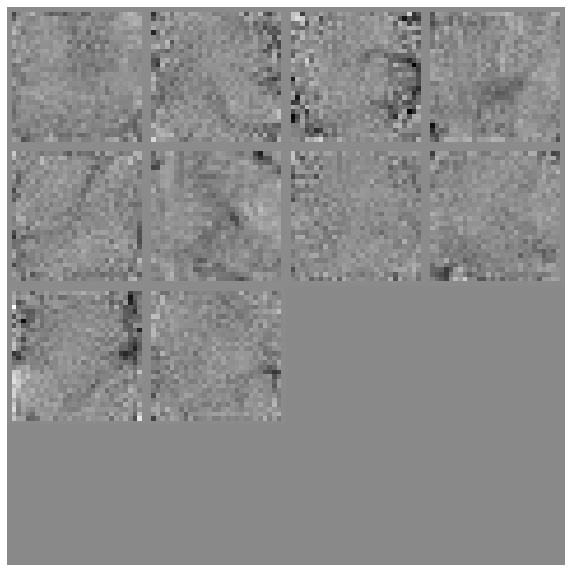

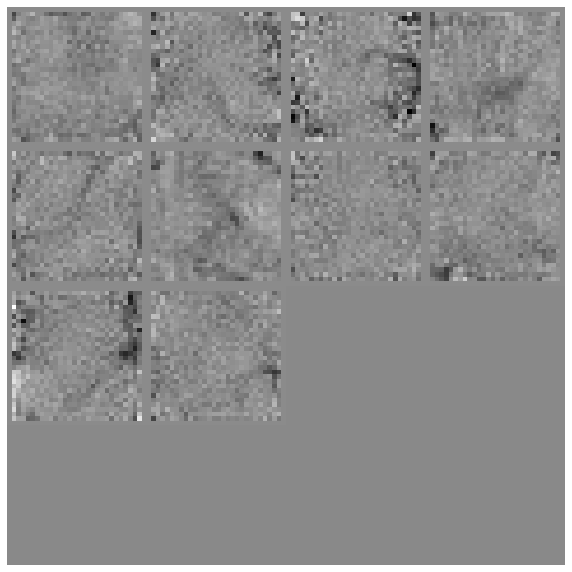

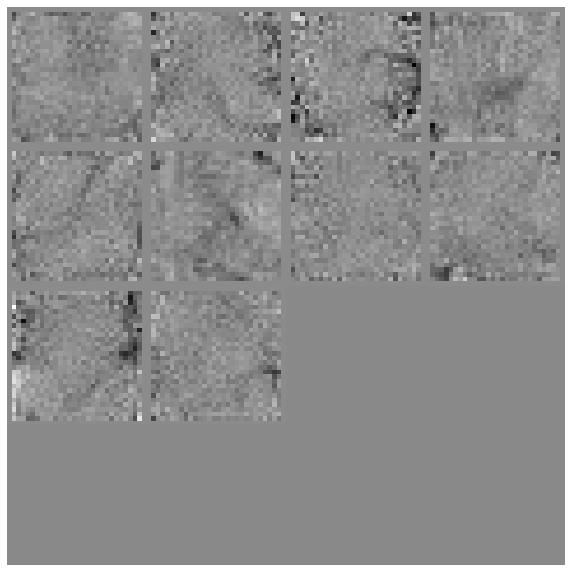

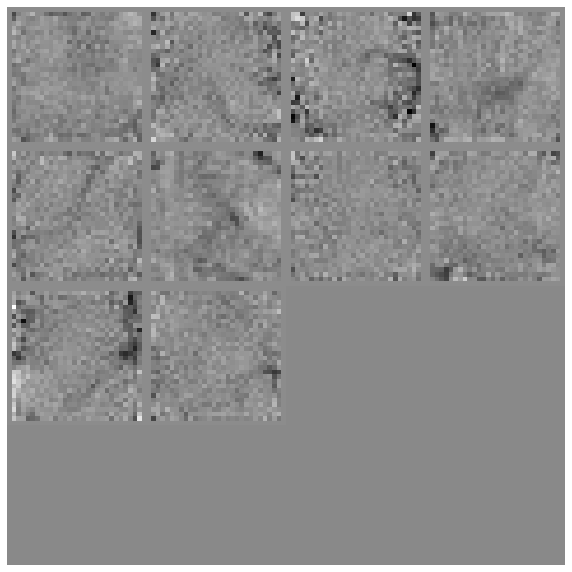

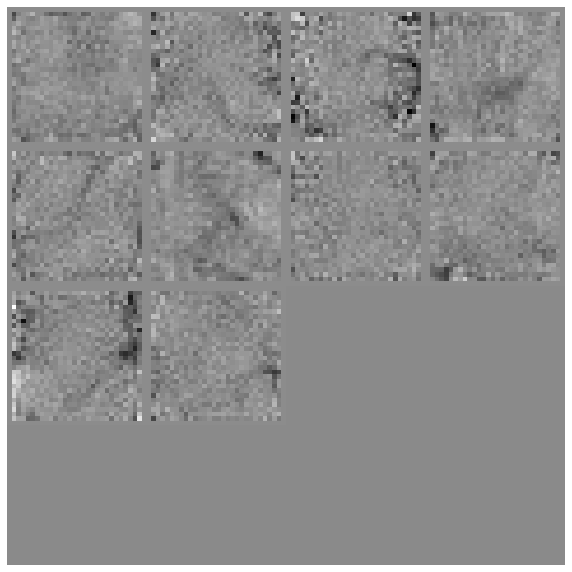

In [ ]:
wb.init(project="Simple_Linear_Adam");
c = wb.config

c.h = 0.01
c.b = 1024
c.epochs = 100000

w = [GPU(Truncated_Normal((784,10)))]

optimizer = torch.optim.Adam(w, lr=c.h)  

for i in range(c.epochs):

    x,y = get_batch('train')

    loss = cross_entropy(softmax(model(x,w)),y)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
   
    wb.log({"loss": loss})

    make_plots()

    if i % 1000 == 0 : montage_plot((w[0].T).reshape(10,28,28).cpu().detach().numpy())

https://playground.tensorflow.org


https://tensorspace.org/

https://docs.google.com/presentation/d/1gY6kLb7YJtWzWqprVe3XfOjHALkPH6I1FvZ7MssWiTU/edit?usp=sharing